In [1]:
COLAB=False #if running on https://colab.research.google.com...

## **Introduction**
***
In 2012, the discovery of the Higgs Boson in the CMS and ATLAS detectors of the Large Hadron Collider (LHC) at CERN in Geneva, Switzerland was a significant milestone in the history of physics. However, despite the validation it provided to the Standard Model (SM), there are still numerous questions in physics that the SM is yet to answer. To uncover some of these mysteries, physicists worldwide are working in different fields. One approach is to study the Higgs Boson and its decay channels in detail, as numerous Beyond Standard Model physics rely on precise measurements of the Higgs decay channel. For the past decade, physicists at CERN and their collaborators have been working on different production and decay channels of the Higgs Boson.

The objective of this challenge is to improve the signal strength of the Higgs boson decay, specifically in the $H \rightarrow \tau \tau$ decay mode and in the 1 lepton 1 hadron decay channel. However, this task is challenging due to the presence of background processes such as the $Z \rightarrow \tau \tau$ process. Additionally, there are systematic uncertainties caused by nuisance parameters like the Tau Energy Scale (TES), which shift the domain space of certain features and make analysis difficult. 

### **Problem Setting**
***
The objective of this challenge is to improve the signal strength of the Higgs boson decay, specifically in the $H \rightarrow \tau \tau$ decay mode and in the 1 lepton 1 hadron decay channel. However, this task is challenging due to the presence of background processes such as the $Z \rightarrow \tau \tau$ process. Additionally, there are systematic uncertainties caused by nuisance parameters like the Tau Energy Scale (TES), which shift the domain space of certain features and make analysis difficult.

**The following are the features in this data set.**


|     | Variable                     | Description                                                                                       |
| --- | ---------------------------- | ------------------------------------------------------------------------------------------------- |
| 1.  | EventId                      | A unique integer identifier of the event. {should **NOT** be used for training} |
| 2.  | DER_mass_MMC                 | The estimated mass $m_H$ of the Higgs boson candidate, obtained through a probabilistic phase space integration. |
| 3.  | DER_mass_transverse_met_lep  | The transverse mass between the missing transverse energy and the lepton.                         |
| 4.  | DER_mass_vis                 | The invariant mass of the hadronic tau and the lepton.                                           |
| 5.  | DER_pt_h                     | The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector. |
| 6.  | DER_deltaeta_jet_jet         | The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num ≤ 1). |
| 7.  | DER_mass_jet_jet             | The invariant mass of the two jets (undefined if PRI_jet_num ≤ 1).                                |
| 8.  | DER_prodeta_jet_jet          | The product of the pseudorapidities of the two jets (undefined if PRI_jet_num ≤ 1).              |
| 9.  | DER_deltar_had_lep           | The R separation between the hadronic tau and the lepton.                                        |
| 10. | DER_pt_tot                   | The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num ≥ 1) and the subleading jet (if PRI_jet_num = 2) (but not of any additional jets). |
| 11. | DER_sum_pt                   | The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num ≥ 1) and the subleading jet (if PRI_jet_num = 2) and the other jets (if PRI_jet_num = 3). |
| 12. | DER_pt_ratio_lep_tau         | The ratio of the transverse momenta of the lepton and the hadronic tau.                           |
| 13. | DER_met_phi_centrality       | The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton. |
| 14. | DER_lep_eta_centrality       | The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI_jet_num ≤ 1). |
| 15. | Eletron Flag                 | 1 if it is an electron 0 if it not.                                                               |
| 16. | muon Flag                    | 1 if it is a muon 0 if it not.                                                                   |
| 17. | PRI_had_pt                   | The transverse momentum $\sqrt{{p_x}^2 + {p_x}^2}$ of the hadronic tau.                          |
| 18. | PRI_had_eta                  | The pseudorapidity $\eta$ of the hadronic tau.                                                    |
| 19. | PRI_had_phi                  | The azimuth angle $\phi$ of the hadronic tau.                                                     |
| 20. | PRI_lep_pt                   | The transverse momentum $\sqrt{{p_x}^2 + {p_x}^2}$ of the lepton (electron or muon).             |
| 21. | PRI_lep_eta                  | The pseudorapidity $\eta$ of the lepton.                                                           |
| 22. | PRI_lep_phi                  | The azimuth angle $\phi$ of the lepton.                                                            |
| 23. | PRI_met                      | The missing transverse energy $\overrightarrow{E}^{miss}_{T}$.                                    |
| 24. | PRI_met_phi                  | The azimuth angle $\phi$ of the missing transverse energy.                                        |
| 25. | PRI_jet_num                  | The number of jets (integer with a value of 0, 1, 2 or 3; possible larger values have been capped at 3). |
| 26. | PRI_jet_leading_pt           | The transverse momentum $\sqrt{{p_x}^2 + {p_x}^2}$ of the leading jet, that is the jet with the largest transverse momentum (undefined if PRI_jet_num = 0). |
| 27. | PRI_jet_leading_eta          | The pseudorapidity $\eta$ of the leading jet (undefined if PRI_jet_num = 0).                     |
| 28. | PRI_jet_leading_phi          | The azimuth angle $\phi$ of the leading jet (undefined if PRI_jet_num = 0).                      |
| 29. | PRI_jet_subleading_pt        | The transverse momentum $\sqrt{{p_x}^2 + {p_x}^2}$ of the leading jet, that is, the jet with the second largest transverse momentum (undefined if PRI_jet_num ≤ 1). |
| 30. | PRI_jet_subleading_eta       | The pseudorapidity $\eta$ of the subleading jet (undefined if PRI_jet_num ≤ 1).                  |
| 31. | PRI_jet_subleading_phi       | The azimuth angle $\phi$ of the subleading jet (undefined if PRI_jet_num ≤ 1).                   |
| 32. | PRI_jet_all_pt               | The scalar sum of the transverse momentum of all the jets of the events.                          |
| 32. | Weight                       | The event weight $w_i$.  {should **NOT** be used for training}                                                                         |
| 33. | Label                        | The event label $y_i \in \{1,0\}$ (1 for signal, 0 for background). {should **NOT** be used for training}                               |


### Classifier method
Narrowing down the number of events to be considered to a Region Of Interest (ROI), rich in signal events, putting a threshold on the output of a classifier providing $Proba(y=signal|{\bf x})$, then apply the estimator:

$\Large \hat{\mu} = \frac{N_{ROI} - \beta_{ROI}}{\gamma_{ROI}}$

In the presence of weights, the number of events is given by the sum of weights


$ w_{pseudo} = Poisson(w_i)$, where $w_i$ the weights of event i 

$N_{pseudo} = \sum_{i = 0}^l w_{pseudo}$ where l is the number of elements in one pseudo dataset

$N_{ROI_{BS}} = \frac{\sum_{i = 0}^m N_{pseudo}}{m} $  where m is the number of pseudo datasets

$\sigma_{ROI_{BS}} =  \frac{\sum_{i = 0}^m (N_{pseudo} - N_{ROI_{BS}} )^2}{m}$

$\gamma_{ROI} = \sum_{i = 0}^n w_{eval}  \forall i \in {S} $ number of signal events in ROI in evaluation set

$\beta_{ROI} = \sum_{i = 0}^n w_{eval}   \forall i \in {B} $ number of Background events in ROI in evaluation set

$\Large \hat{\mu} =  \frac{N_{ROI_{BS}} - \beta_{ROI}}{\gamma_{ROI}}   $

$\Delta \hat{\mu} = |\frac{\sigma_{ROI_{BS}} - \beta_{ROI}}{\gamma_{ROI}}|$

This estimator has variance:

$\Large \sigma^2_{\hat{\mu}} = \frac{\nu_{ROI}}{\gamma_{ROI}^2} $

which is lower than that of the plain Poisson counting process, if and only if  $\gamma_{ROI}$. $\gamma_{ROI} / \nu_{ROI}$ > $\gamma$ . $\gamma / \nu$. We see that $\gamma_{ROI} / \nu_{ROI}$ > $\gamma / \nu$ is NOT a sufficient condition to lower the variance of the estimator of $\mu$. There is a tradeoff between increasing $\gamma_{ROI} / \nu_{ROI}$ and not decreasing $\gamma_{ROI}$ too much, that is going into regions "enriched" in signal, but in which the total number of signal events approaches 0.

Here $\gamma_{ROI}$ and $\beta_{ROI}$ are NOT assumed to be known constants (like in the histogram method); they need to be estimated with the simulator, and, likewise, could be plagued with systematic error. Thus, in the presence of systematics, this simple estimator underestimates the variance of $\hat{\mu}$. **This is the problem we want to solve.**


### Imports

In [2]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore")

In [3]:
if COLAB == True :
    !pip install PyDrive

    if os.path.exists('./fair-universe/'):
        !rm -r fair-universe
    if os.path.exists('./input_data/'):
        !rm -r input_data
    !git clone https://github.com/Ragansu/fair-universe.git fair-universe
    !ls
    !pwd

    import os
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    download = drive.CreateFile({'id': '1sJzBVEJQcQ76VKjFCGC8KBT0lVHAGKIl'})
    download.GetContentFile("reference_data.csv")
    !cp reference_data.csv fair-universe/Competition_Bundle_HEP/

    root_dir = (path[0])+'/fair-universe/Competition_Bundle_HEP/'

else :
    module_dir= (path[0])
    root_dir = os.path.dirname(module_dir)



### Updating your model
By this point you should have a clone of the repo which contains the ```sample_code_submission/model.py``` by editing this file you can create your own AI models and test it with the help of the remaining part of the notebook. 

### Directories

In [4]:
# Input data directory to read training data from

# Input data directory
input_dir = os.path.join(root_dir, 'input_data')

# Output data directory to write predictions to
output_dir = os.path.join(root_dir, 'sample_result_submission')

# Program directory
program_dir = os.path.join(root_dir, 'ingestion_program')

# Directory to read submitted submissions from
model_dir = os.path.join(root_dir, 'sample_code_submission')

# Directory to read visualizations from
visualizer_dir = os.path.join(root_dir, 'visualize')

# Score directory to read scoring code from
score_dir = os.path.join(root_dir, 'scoring_program')


### Add directories to path

In [5]:
path.append(model_dir) 
path.append(program_dir)
path.append(score_dir)
path.append(root_dir)
path.append(visualizer_dir)

print(path)


['x:\\Fair Universe 2023\\fair-universe\\Competition_Bundle_HEP\\Starting_kit', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\python310.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib', 'C:\\Users\\THINKPAD\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0', '', 'C:\\Users\\THINKPAD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages', 'C:\\Users\\THINKPAD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32', 'C:\\Users\\THINKPAD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packa

**Further Imports**

In [6]:
# from data_loader import get_settings_from_json

from datagen_temp import dataGenerator
from ingestion import Ingestion
from visualise import *
from score import *

In [7]:
# Create Input Data. 
dataGenerator()

# Init Ingestion
ingestion = Ingestion()

# Start timer
ingestion.start_timer()


In [8]:
# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


### Visualise Data 

The next part of the code helps you visualise the data_set used for this challenege. 

In [9]:

Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [10]:
''' This function will give a summary of the dataset and the features
    - Number of events
    - Number of features
    - Number of signal events
    - Number of background events
    - mean and std of each feature and other statistical information

'''
columns = ['PRI_jet_leading_pt', 'PRI_met', 'DER_mass_vis', 'DER_mass_jet_jet', 'DER_deltar_lep_had', 'DER_sum_pt']
Train_data_vis.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- Number of events : 193205
[*] --- Number of features : 32
[*] --- Number of signal events : 136243
[*] --- Number of background events : 56962
[*] --- List of all features


Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag',
       'PRI_muon_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi',
       'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep',
       'DER_deltar_had_lep', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
0,36.4439,-0.875770,-0.490327,0,1,37.9539,0.493459,2.85688,37.9539,0.493459,...,67.789831,-0.641275,3.23957,68.642500,136.4905,0.960215,29.481014,3.239561,1.414144,0.757265
1,21.0843,1.450980,-0.202708,0,1,25.2625,1.775320,2.84154,25.2625,1.775320,...,-7.000000,-7.000000,3.06147,31.676398,46.3468,0.834609,14.672255,3.061477,-1.411395,-7.000000
2,40.7751,-0.243219,2.113350,1,0,24.7791,-0.810190,-1.46528,100.0330,-2.323550,...,1446.903819,-8.114278,2.76334,25.503483,263.6032,1.645544,17.890343,2.763345,1.373911,0.922204
3,29.9970,-0.322001,-1.378440,0,1,28.0656,-0.454662,1.80657,28.0656,-0.454662,...,-7.000000,-7.000000,3.10102,31.347050,58.0626,1.068817,27.071643,3.101014,1.414144,-7.000000
4,29.7900,-0.317304,-1.599440,1,0,41.0963,0.833399,1.70456,41.0963,0.833399,...,-7.000000,-7.000000,3.19369,45.148792,70.8863,0.724883,8.642850,3.193691,-1.396848,-7.000000


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
count,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,...,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000,193205.000000
mean,33.476896,0.000796,-0.003037,0.448291,0.551709,44.448040,0.002523,0.000632,67.899156,0.006261,...,144.399182,-2.657293,2.587842,53.457270,174.399902,0.870240,20.623241,2.587842,0.492657,-2.592677
std,17.877583,1.189473,1.813691,0.497320,0.497320,23.656773,1.217168,1.811752,59.131771,1.557461,...,274.430047,4.259613,0.711894,37.401399,142.644898,0.548521,20.192854,0.711894,1.117860,3.641344
min,20.000200,-2.499920,-3.141550,0.000000,0.000000,22.917500,-2.663630,-3.141570,22.939800,-4.890660,...,-7.000000,-21.902760,0.517385,0.134850,43.072100,0.037949,0.000458,0.517385,-1.414214,-7.000000
25%,23.809700,-0.901365,-1.575830,0.000000,0.000000,31.041500,-0.936296,-1.570540,35.535700,-1.123250,...,-7.000000,-7.000000,2.151750,33.153353,69.668700,0.546930,5.837668,2.151755,-0.682718,-7.000000
50%,28.644300,-0.003163,-0.002569,0.000000,1.000000,38.755900,0.009375,0.010865,46.566000,0.011472,...,71.269073,-1.875613,2.843070,46.037296,139.430200,0.752182,14.346853,2.843065,1.124086,0.000002
75%,36.399200,0.903322,1.568990,1.000000,1.000000,49.431300,0.937963,1.562560,73.197600,1.133890,...,179.406607,0.471772,3.106500,62.781460,222.185500,1.033994,29.957463,3.106509,1.380790,0.462840
max,576.872000,2.499990,3.141540,1.000000,1.000000,673.323000,2.682640,3.141550,1575.320000,4.919970,...,6865.710623,19.573016,5.777640,1143.009736,2869.378200,13.694428,555.207055,5.777639,1.414214,1.000000


<Figure size 640x480 with 0 Axes>

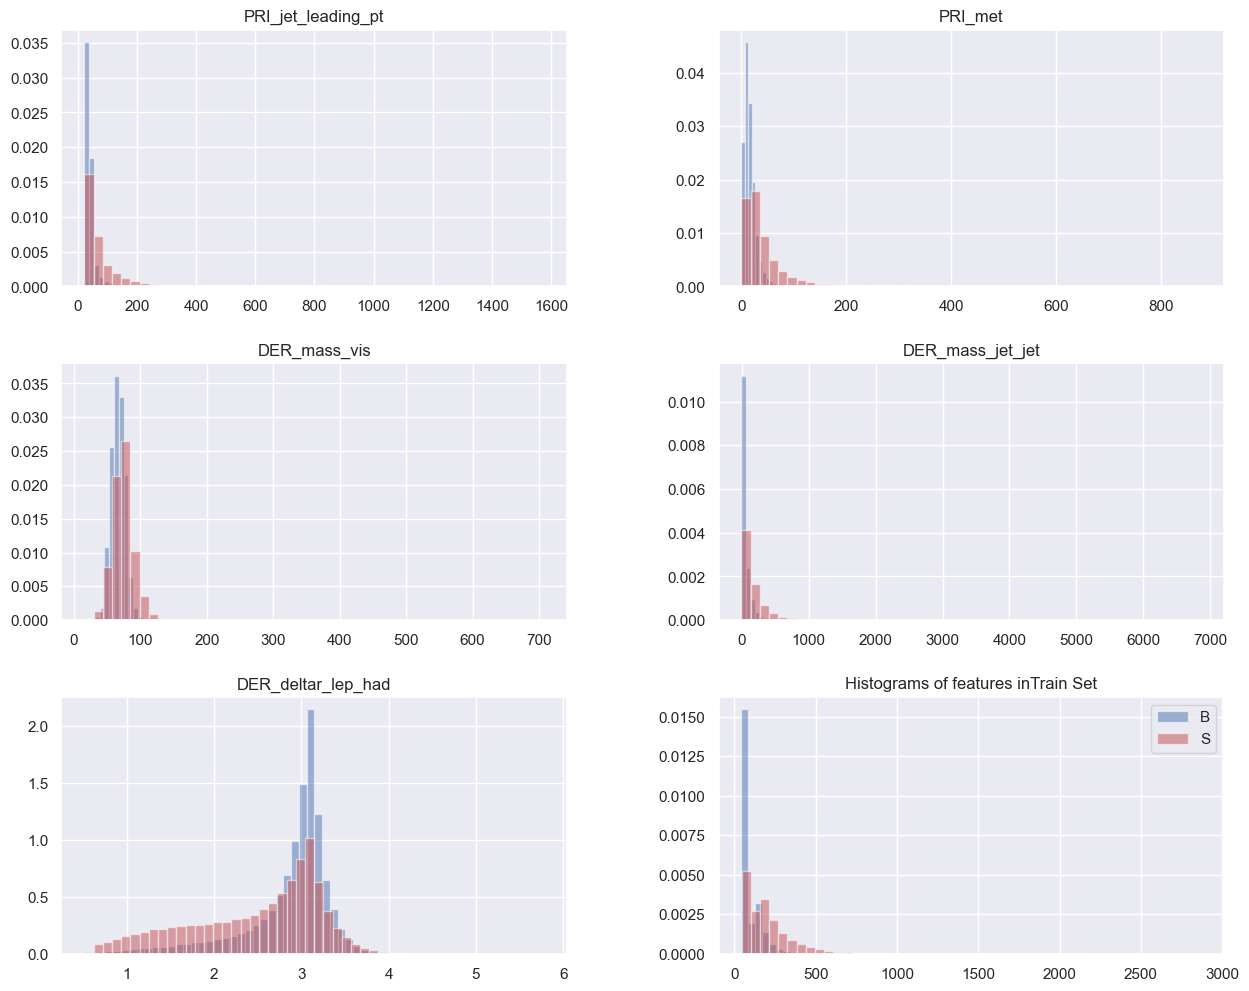

In [11]:
''' 
This function will plot the histogram of each feature in the dataset for signal and background events,
for given set of columns. Columns to be plotted can be specified by the user.

NB: 
 - This function will take a long time to run if the number of columns is large, 
 - If no columns are given it will plot all the columns of the dataset.

'''
Train_data_vis.histogram_dataset(columns=columns)

Signal feature  correlation matrix


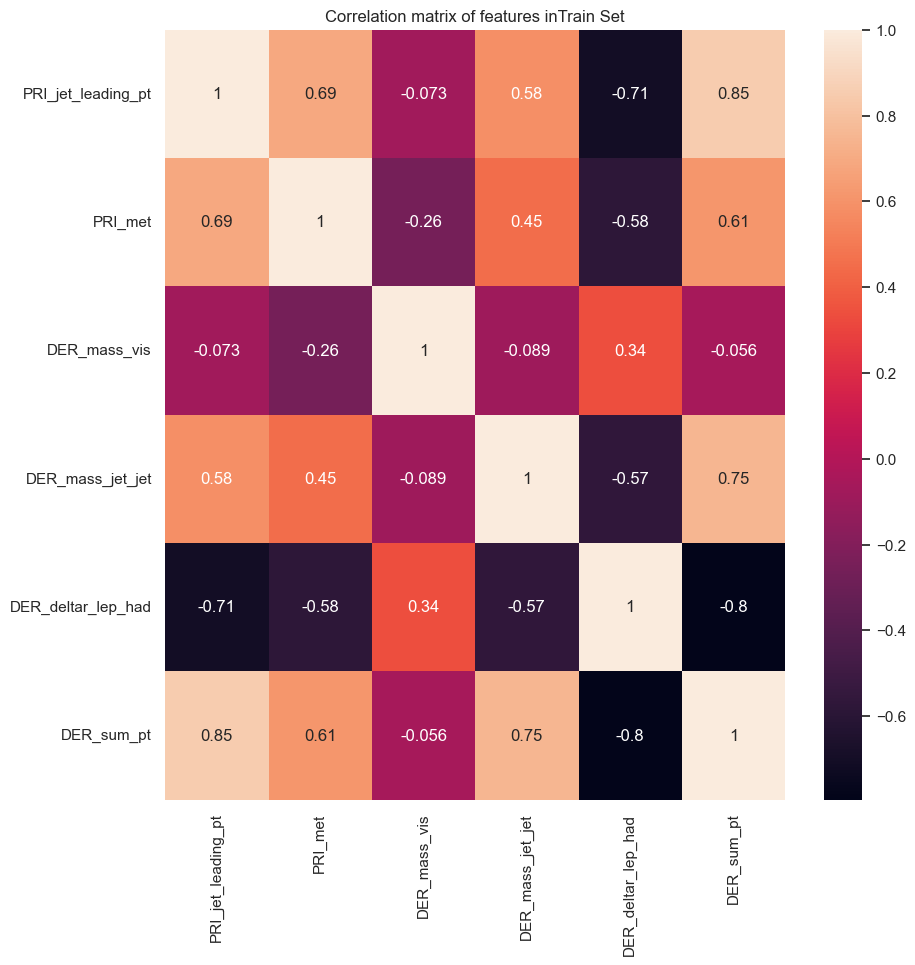

Background feature  correlation matrix


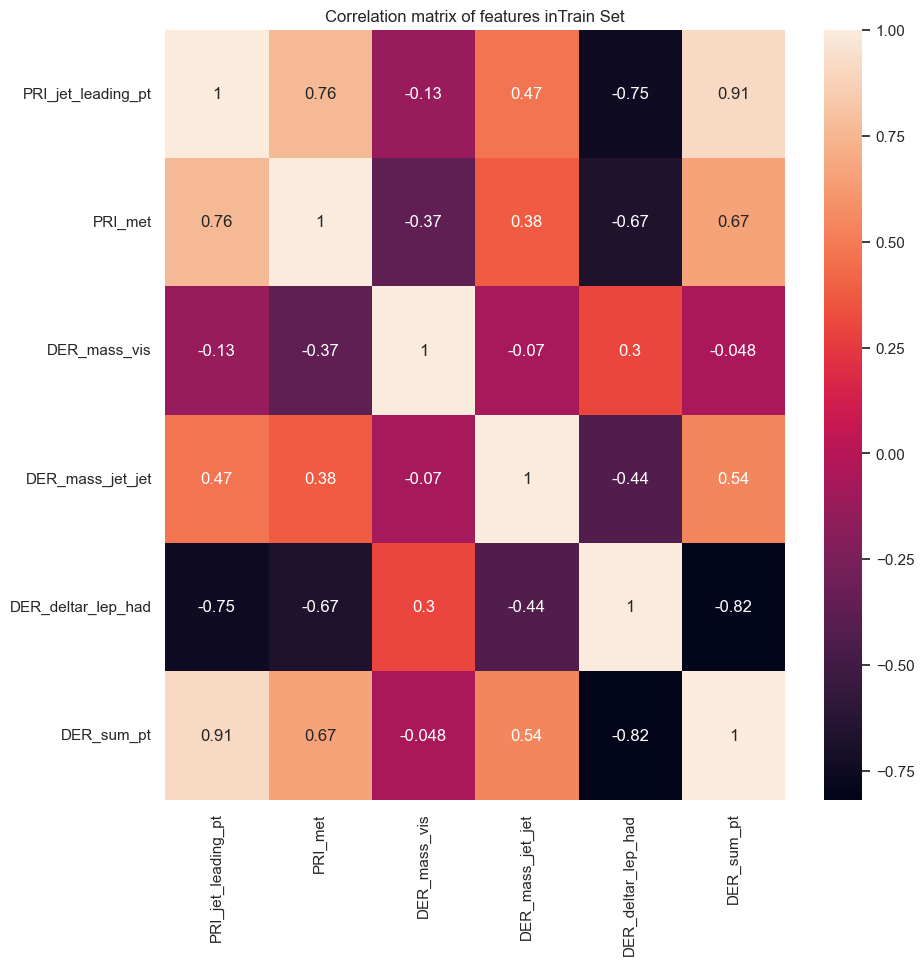

In [12]:
'''
This function will plot the correlation matrix of the features in the dataset for the given columns,
for the signal and background events separately

NB: 
 - This function will take a long time to run if the number of columns is large, 
 - If no columns are given it will plot all the columns.
'''
Train_data_vis.correlation_plots(columns=columns)

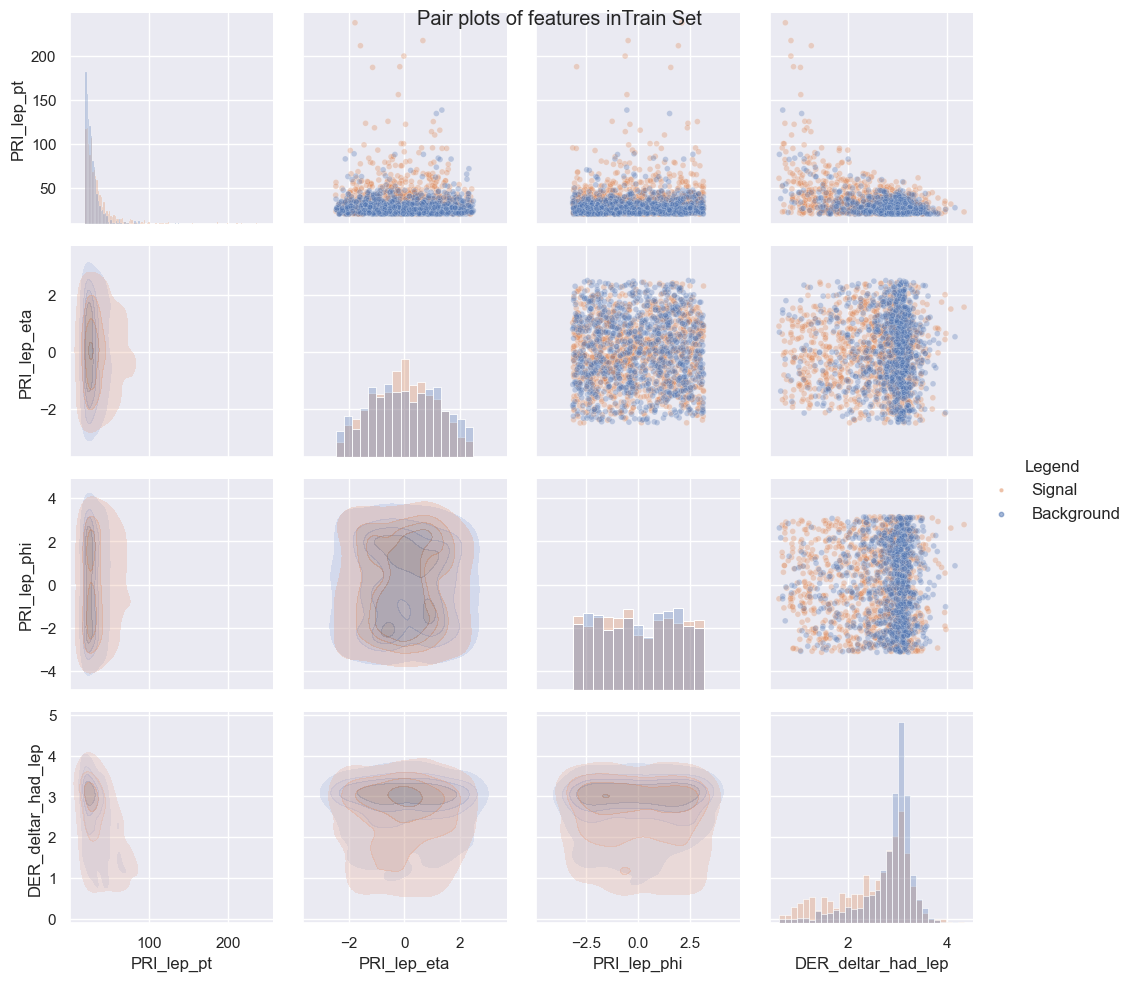

In [13]:
''' 
This function will plot the pair plots of the features in the dataset for the given columns 
for the signal and background events separately

NB: 
 - This function will take a long time to run if the number of columns is large, 
 - If no columns are given it will plot all the columns of the dataset.
'''
Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [14]:
# Train_data_vis.cluster_plot(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])

In [15]:
# n = 1
# for i in range(n):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [16]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()


model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
[*] --- original signal: 9666.051853714005 --- original background: 2860861.8102
[*] --- train signal: 9666.051853714003 --- train background: 2860861.8101999997
[*] --- valid signal: 9666.051853714005 --- valid background: 2860861.8102
[*] --- mu_calc_set signal: 9666.051853714005 --- mu_calc_set background: 2860861.8102000006
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.8102
sum of background 2860861.8101999997
[1]	training's auc: 0.830076	valid_1's auc: 0.500804
[2]	training's auc: 0.83722	valid_1's auc: 0.500804
[3]	training's auc: 0.841615	valid_1's auc: 0.679974
[4]	training's auc: 0.843153	valid_1's auc: 0.679974
[5]	training's auc: 0.844323	valid_1's auc: 0.679974
[6]	training's auc: 0.845847	valid_1's auc: 0.679974
[7]	training's auc: 0.847014	valid_1's auc: 0.679974
[8]	training's a

In [17]:
# results = model.model.evals_result()

# validationcurve(results,'auc')

In [18]:
# validationcurve(results,'logloss')

In [19]:
# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Calling predict method of submitted model
[*] - Testing


[*] - Computing Test result

[*] --- AUC test : 0.8654548010330884
[*] --- total weight test: 2870527.8620537138
[*] --- total weight train: 2870527.8620537138
[*] --- total weight mu_cals_set: 2870527.862053714
[*] --- total test signal : 9666.051853714003
[*] --- total test background train: 2860861.8102
[*] --- Significance : 0
[*] --- delta_mu_stat : 0.03266765809492187
[*] --- mean N: 937.1607 --- sigma N: 30.41345550097847
[*] --- signal: 896.7953277507654 --- background: 1694.5594505749282
[*] --- delta_mu_hat: 0.0678269713497679
[*] --- signal test: 937.0526580244897 --- background test: 0.0 --- N_roi 937.1607

[*] --- mu hat test :-0.8445614368604539 + -0.81064795118557 - -0.8784749225353379

[*] --- AUC test : 0.8670441434873964
[*] --- total weight test: 2870527.8620537147
[*] --- total weight train: 2870527.8620537138
[*] --- total weight mu_cals_set: 2870527.862053714
[*] --- total test signal : 9666.051853714003
[*] --- total test background train: 2860861.8101999997
[*] 

## Visualise Model

<Figure size 1600x1400 with 0 Axes>

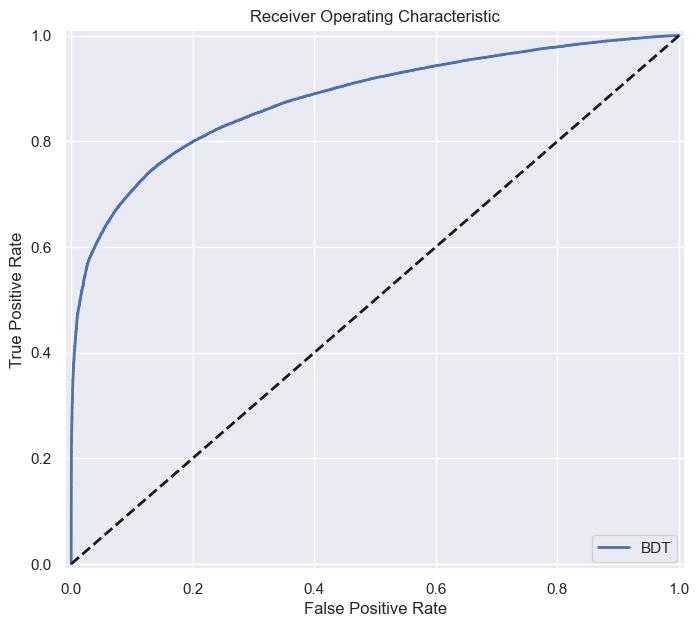

<Figure size 1600x1400 with 0 Axes>

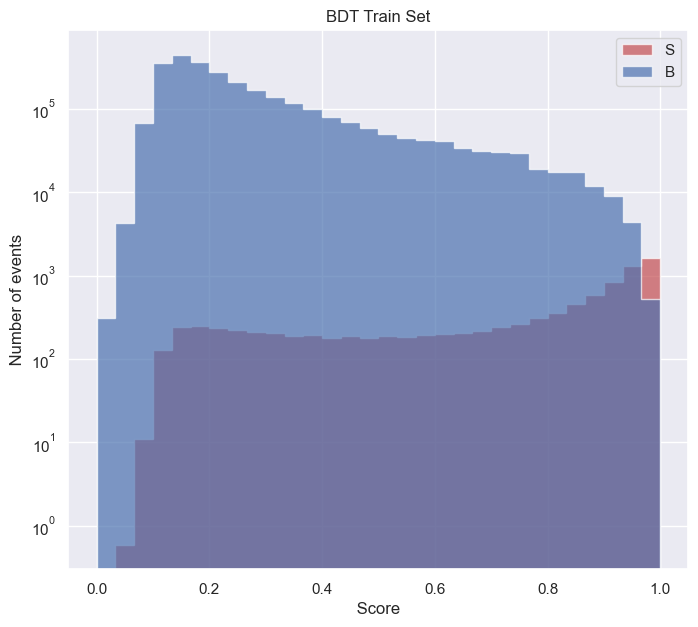

<Figure size 800x700 with 0 Axes>

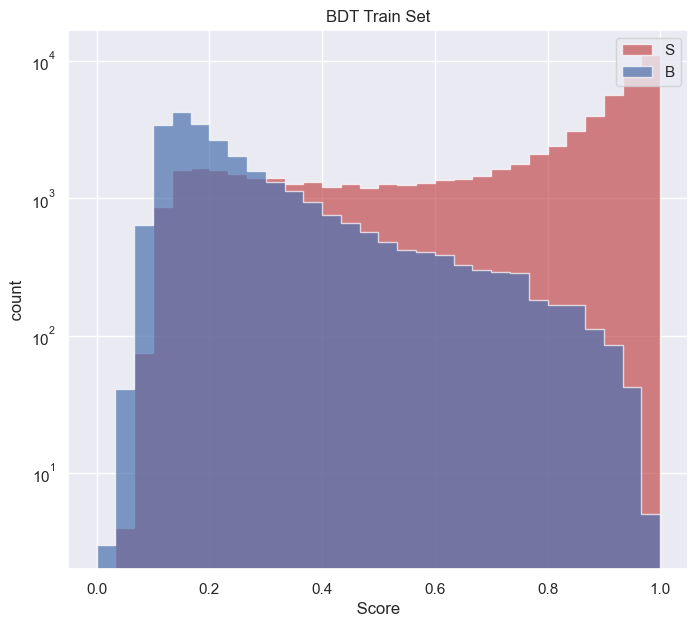

In [20]:
'''
This function will plot the ROC curve for the given scores, labels and weights
'''
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

'''
This function will plot histogram of events vs score for signal and background events separately
'''
events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

'''
This function will plot histogram of score for signal and background events separately
'''
score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


<Figure size 800x700 with 0 Axes>

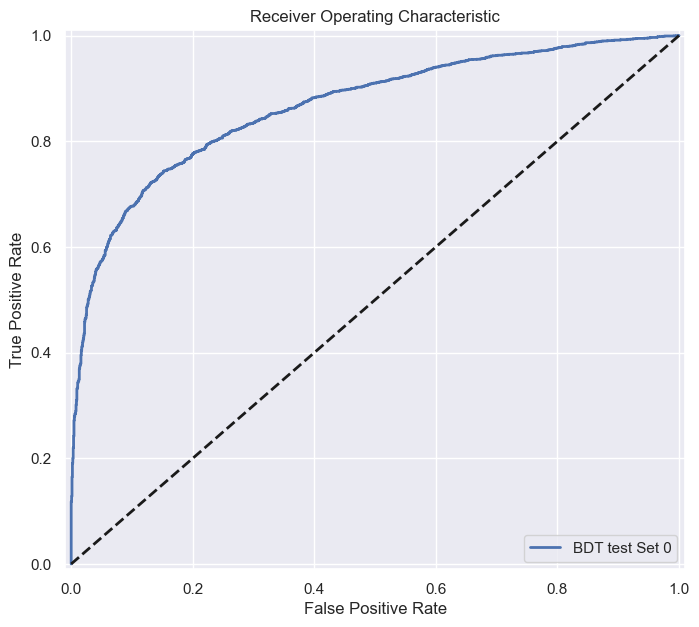

<Figure size 800x700 with 0 Axes>

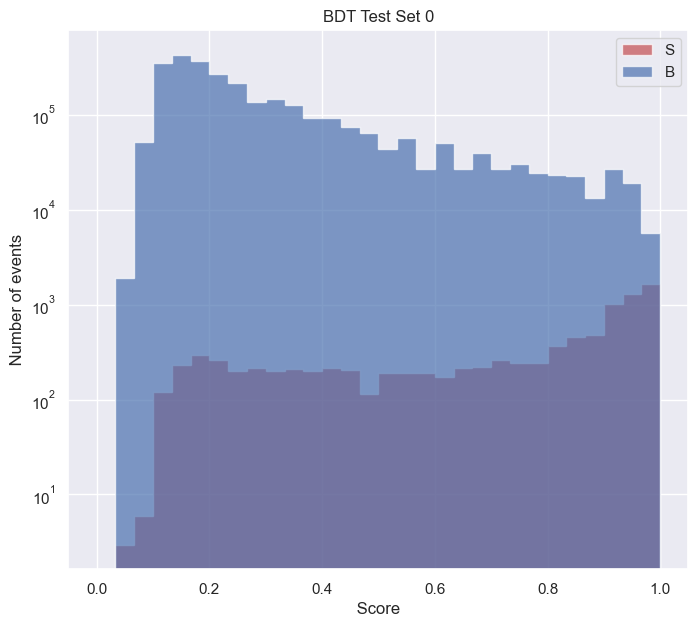

<Figure size 800x700 with 0 Axes>

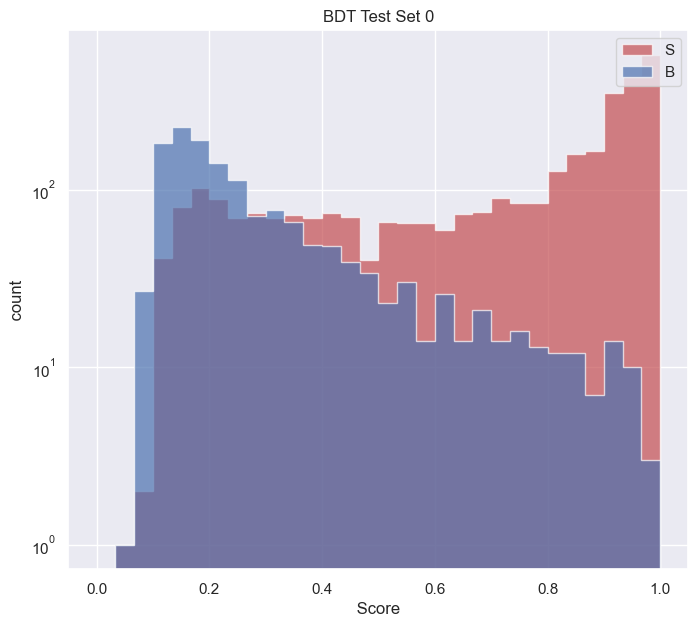

<Figure size 800x700 with 0 Axes>

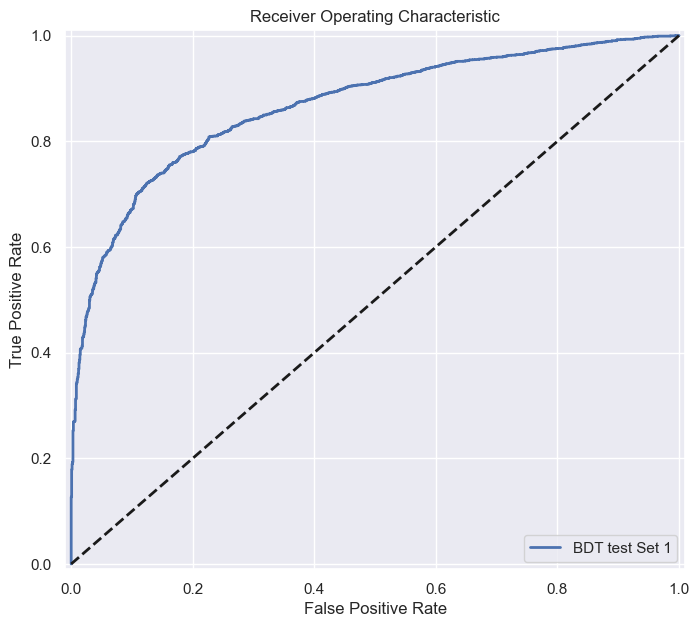

<Figure size 800x700 with 0 Axes>

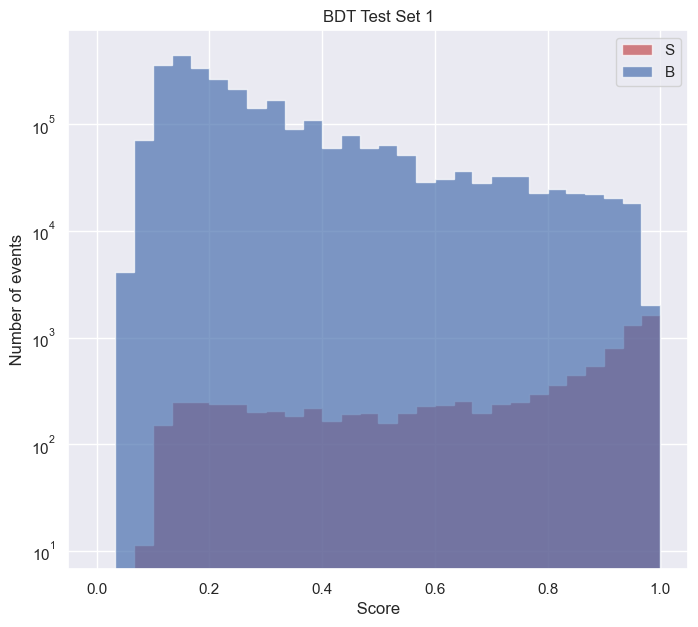

<Figure size 800x700 with 0 Axes>

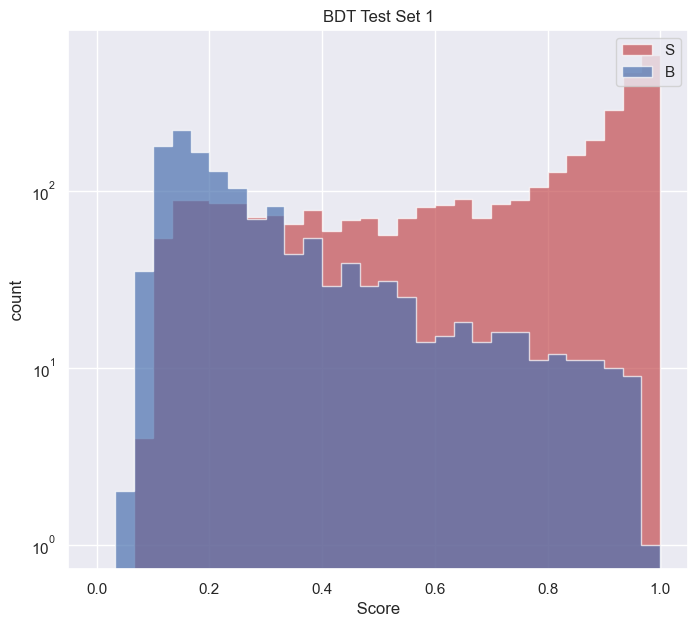

<Figure size 800x700 with 0 Axes>

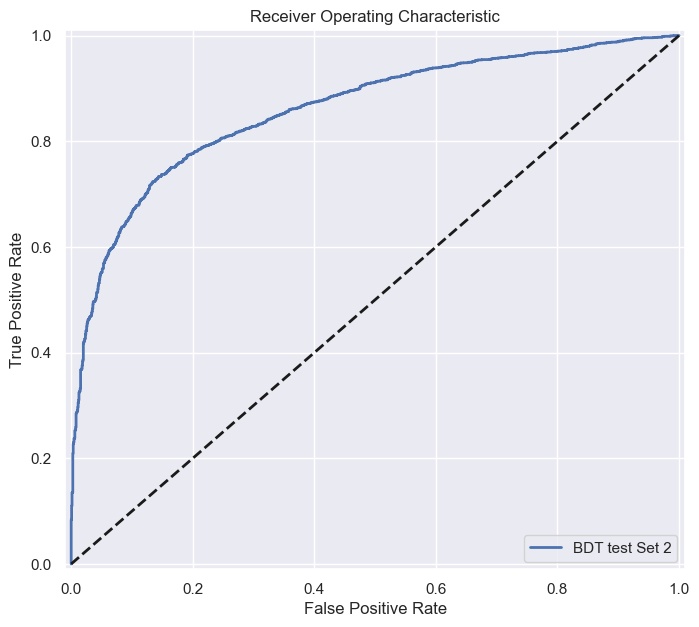

<Figure size 800x700 with 0 Axes>

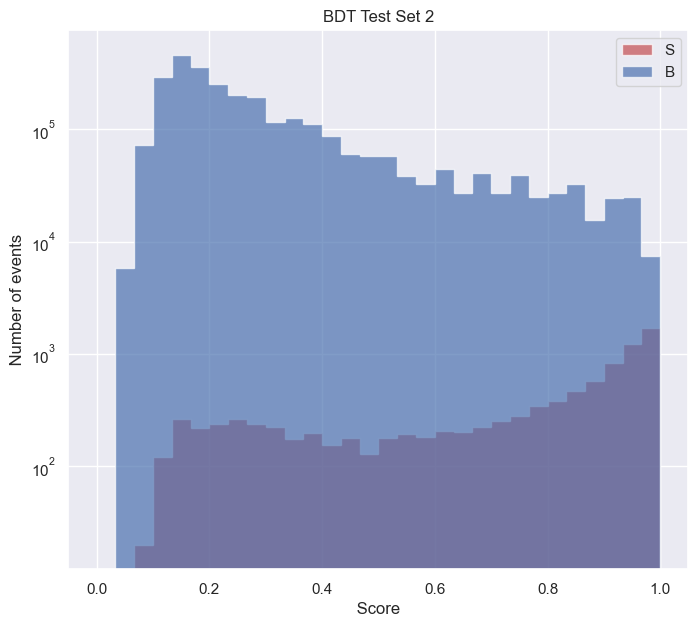

<Figure size 800x700 with 0 Axes>

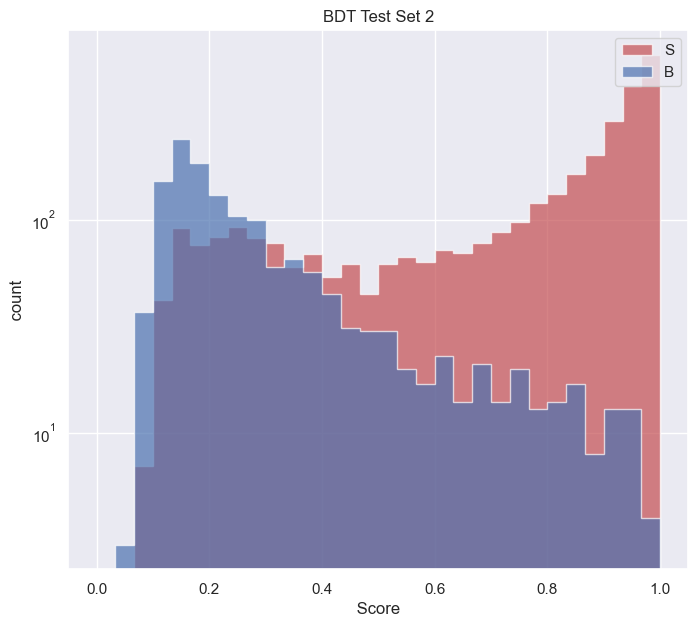

<Figure size 800x700 with 0 Axes>

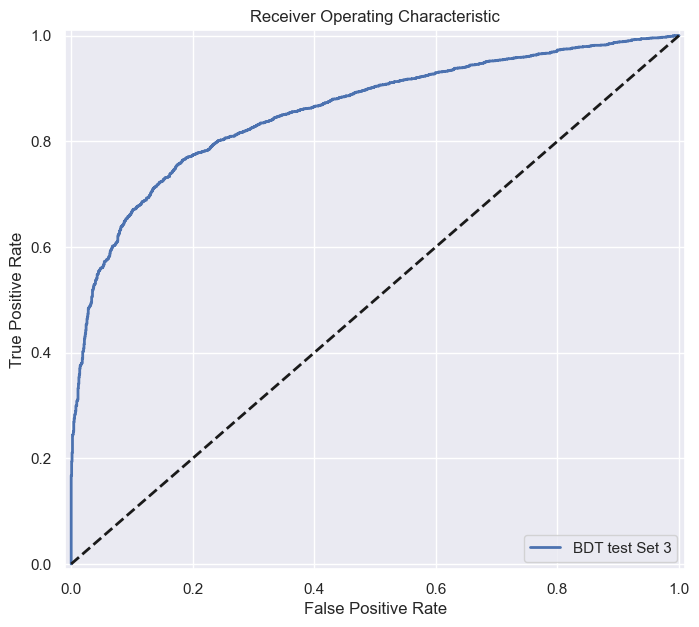

<Figure size 800x700 with 0 Axes>

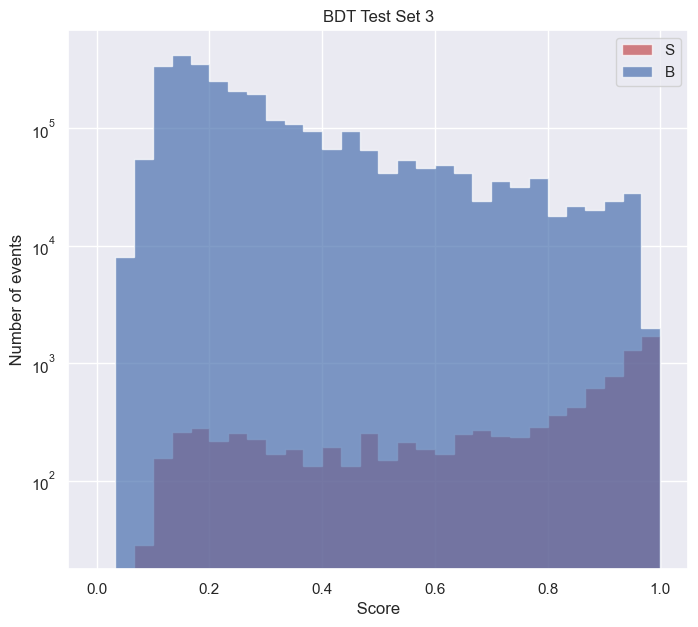

<Figure size 800x700 with 0 Axes>

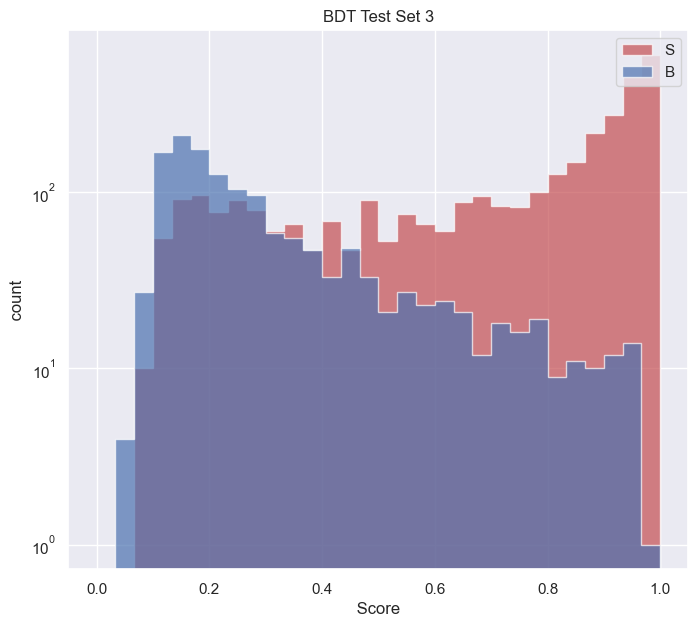

<Figure size 800x700 with 0 Axes>

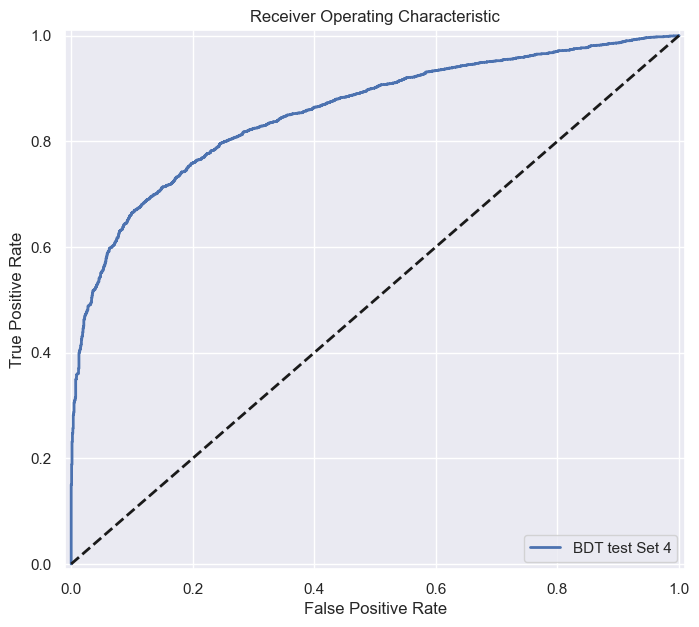

<Figure size 800x700 with 0 Axes>

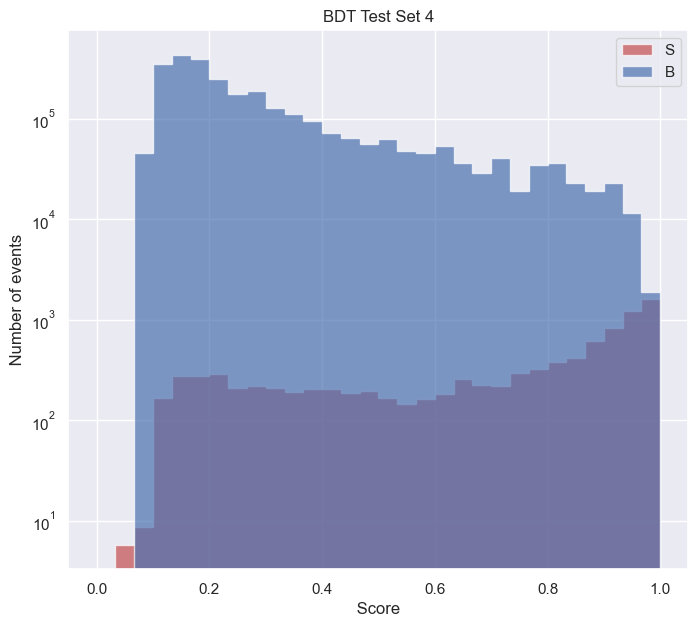

<Figure size 800x700 with 0 Axes>

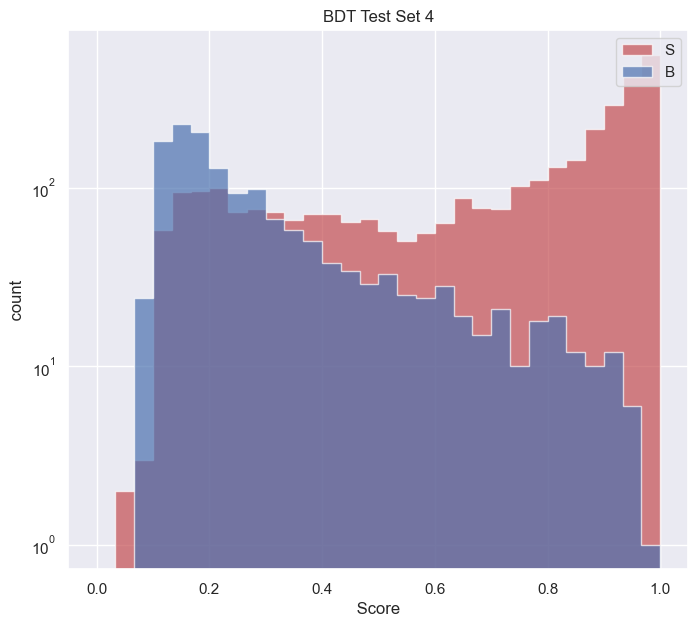

<Figure size 800x700 with 0 Axes>

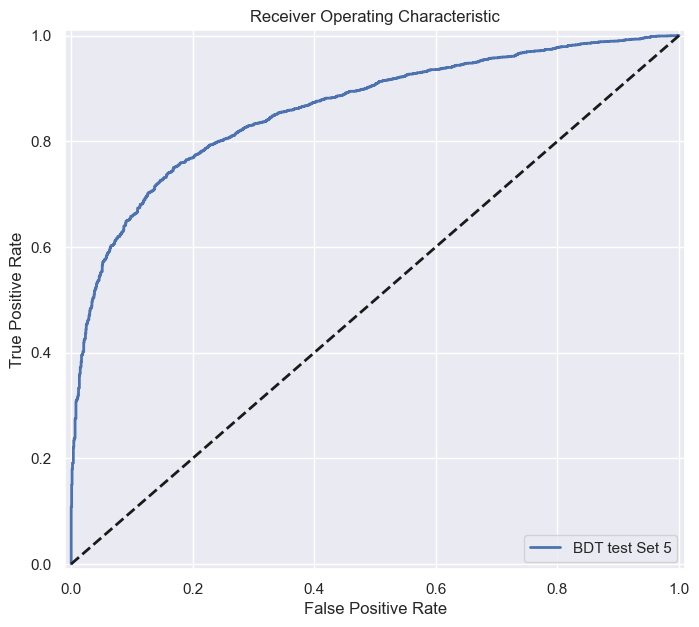

<Figure size 800x700 with 0 Axes>

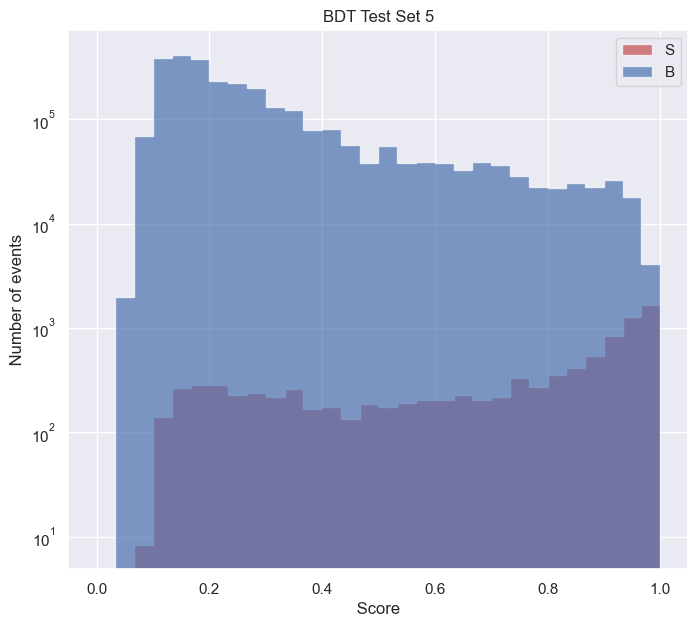

<Figure size 800x700 with 0 Axes>

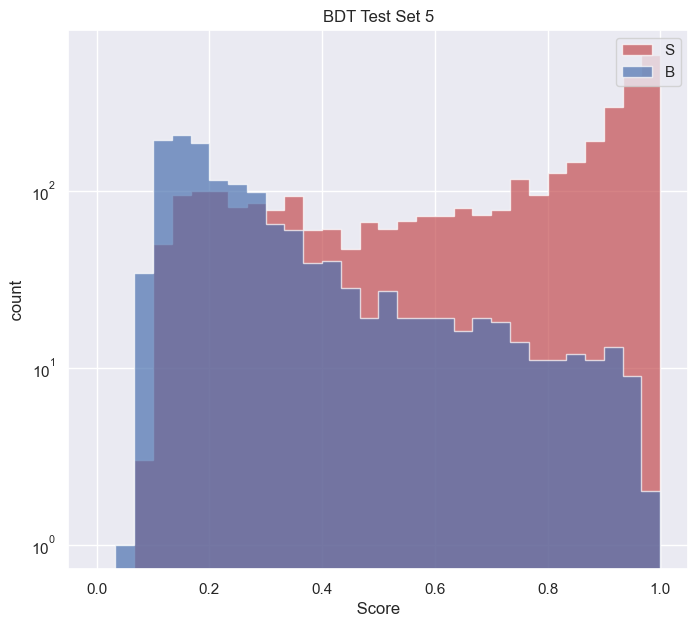

<Figure size 800x700 with 0 Axes>

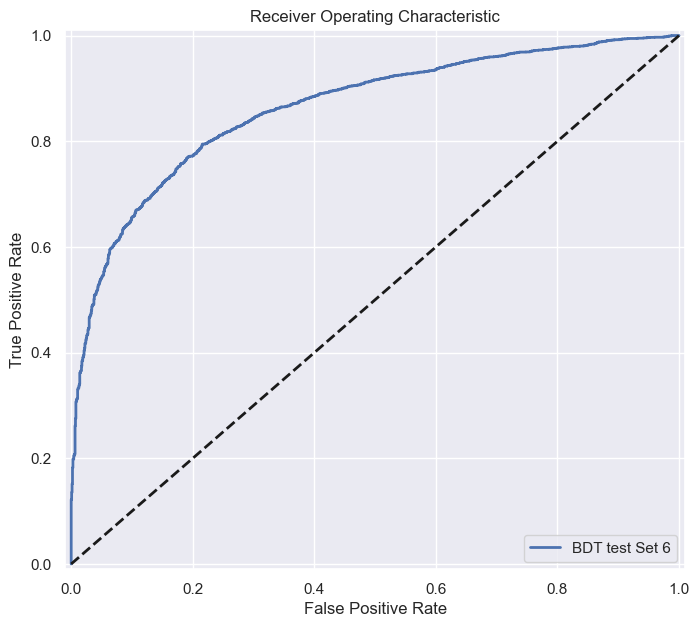

<Figure size 800x700 with 0 Axes>

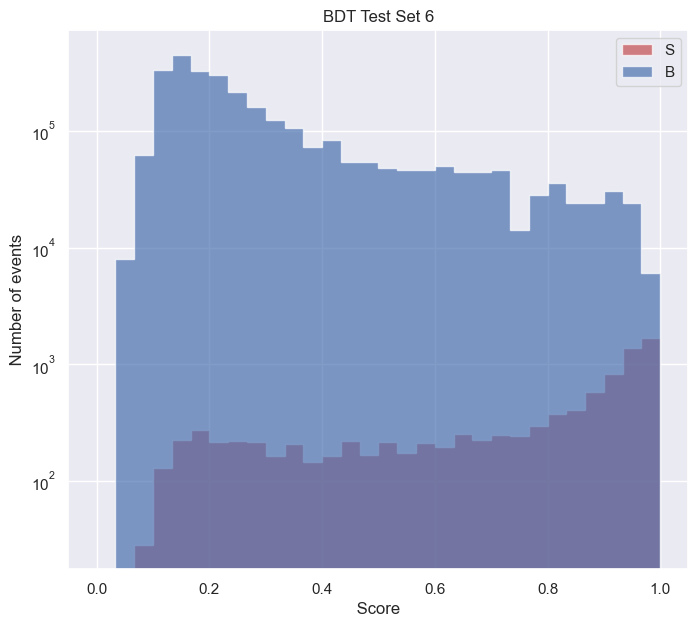

<Figure size 800x700 with 0 Axes>

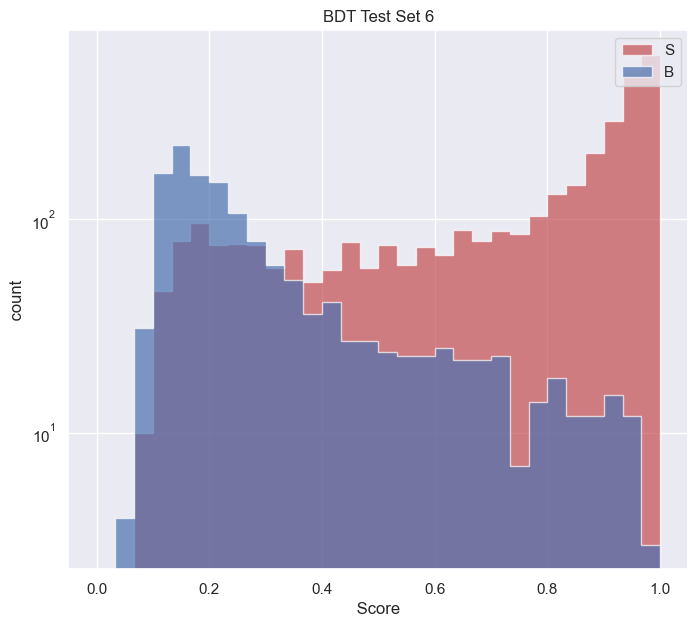

<Figure size 800x700 with 0 Axes>

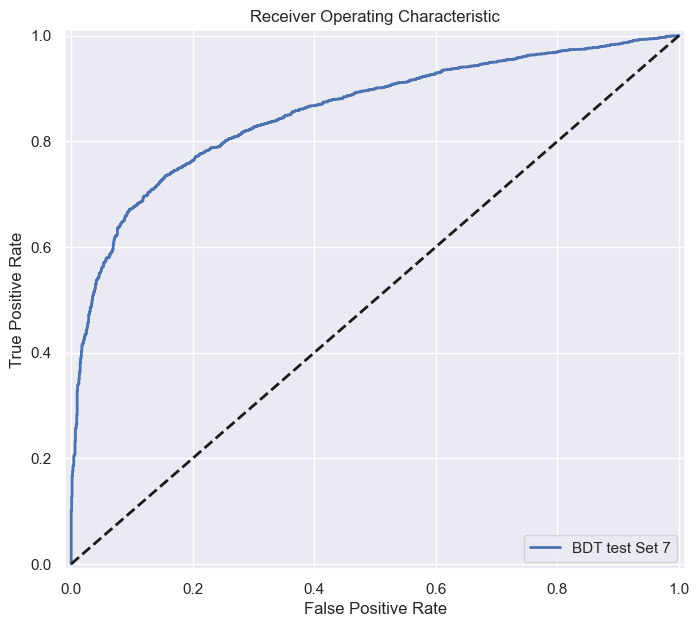

<Figure size 800x700 with 0 Axes>

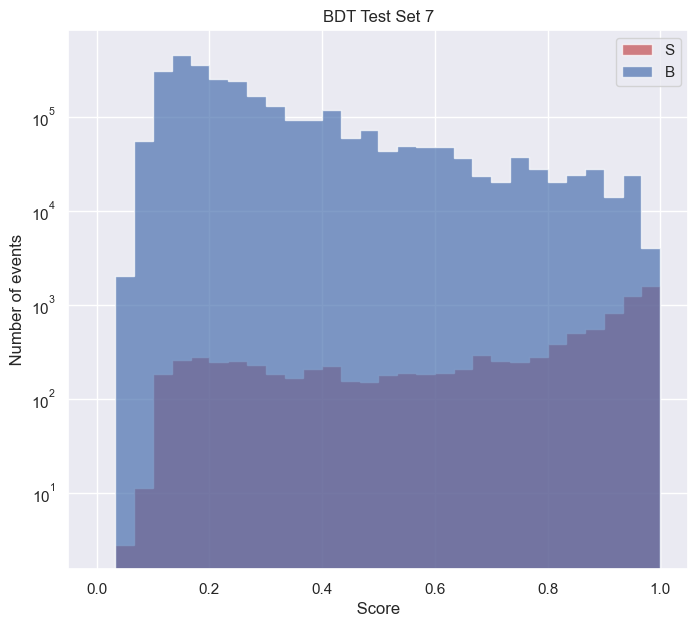

<Figure size 800x700 with 0 Axes>

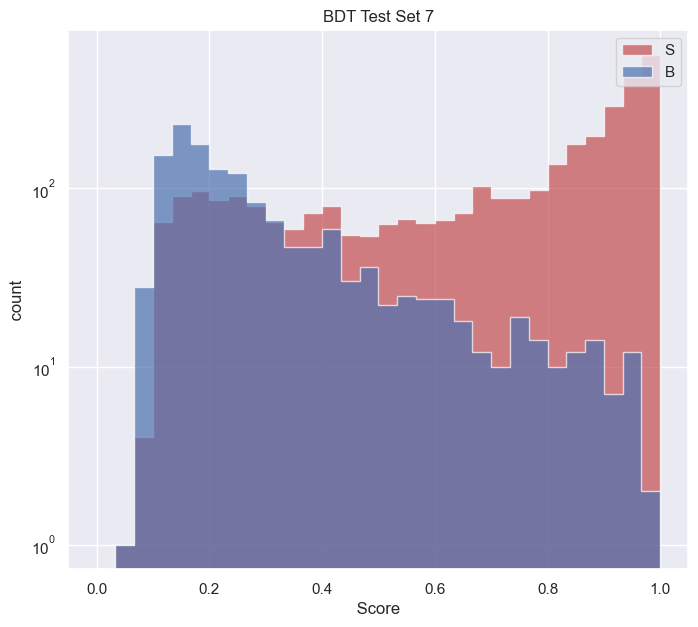

<Figure size 800x700 with 0 Axes>

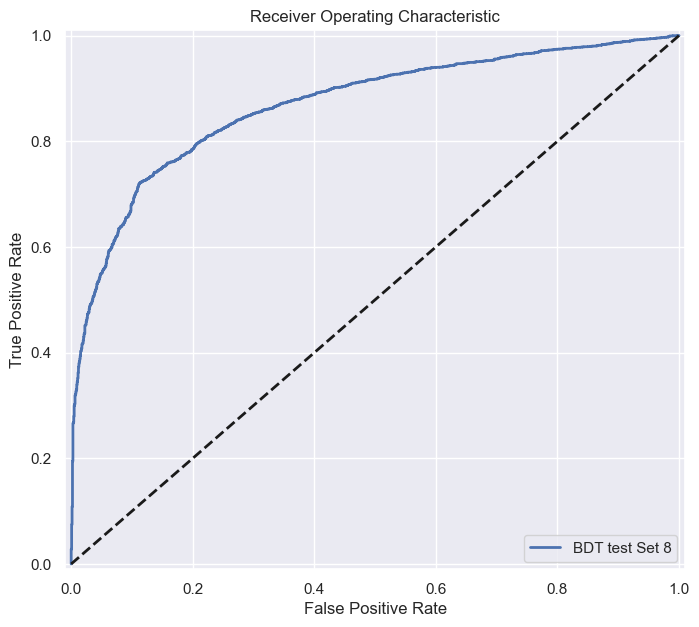

<Figure size 800x700 with 0 Axes>

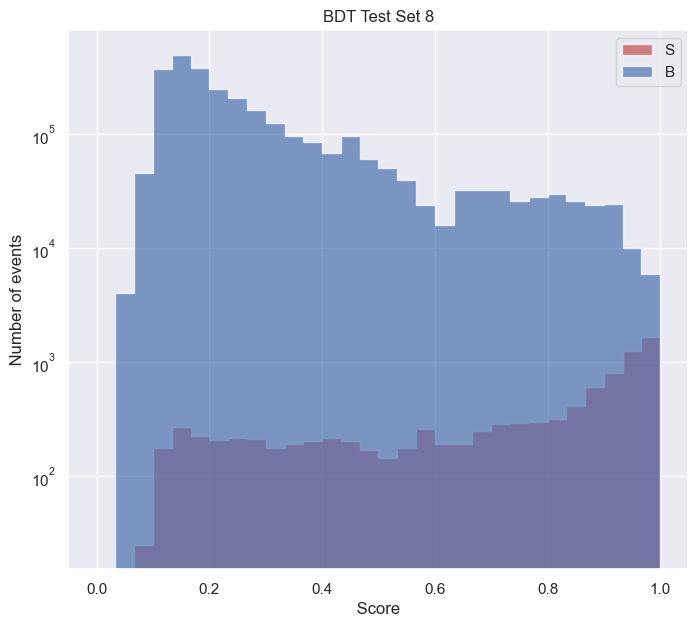

<Figure size 800x700 with 0 Axes>

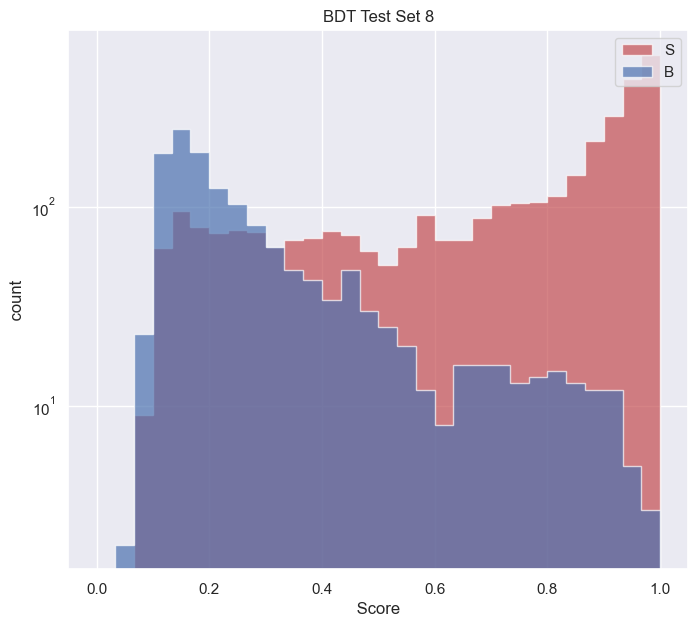

<Figure size 800x700 with 0 Axes>

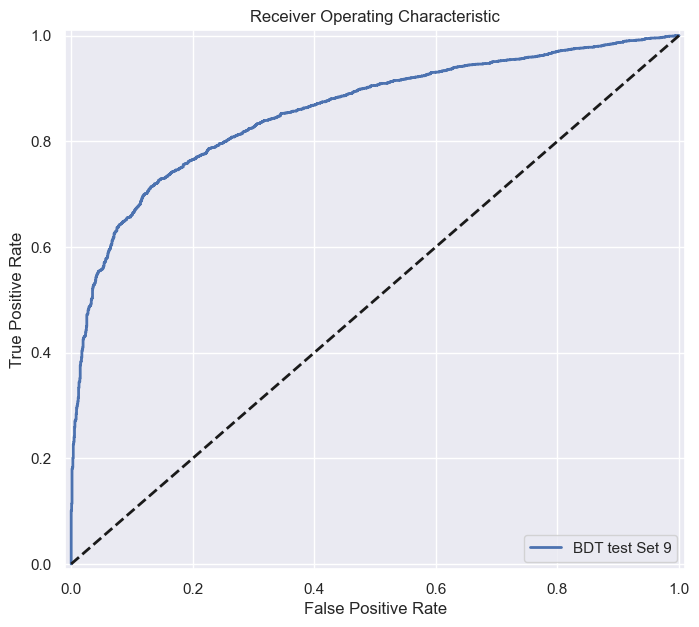

<Figure size 800x700 with 0 Axes>

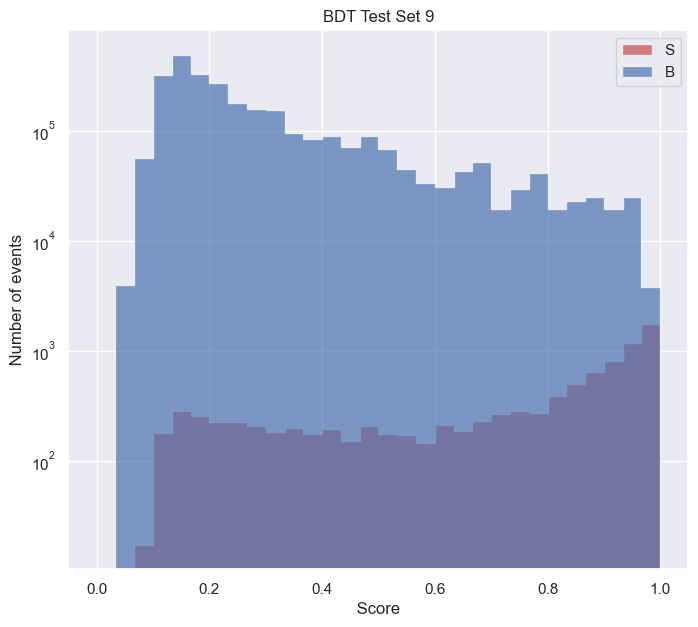

<Figure size 800x700 with 0 Axes>

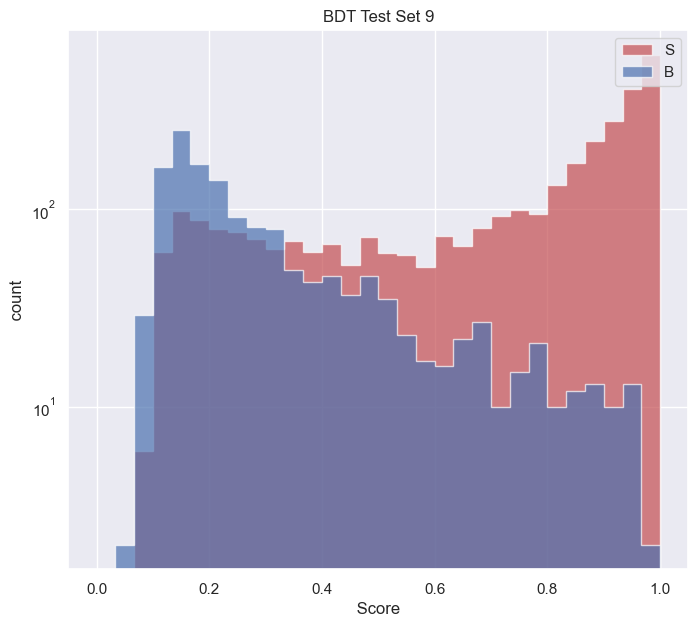

In [21]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

<Figure size 800x700 with 0 Axes>

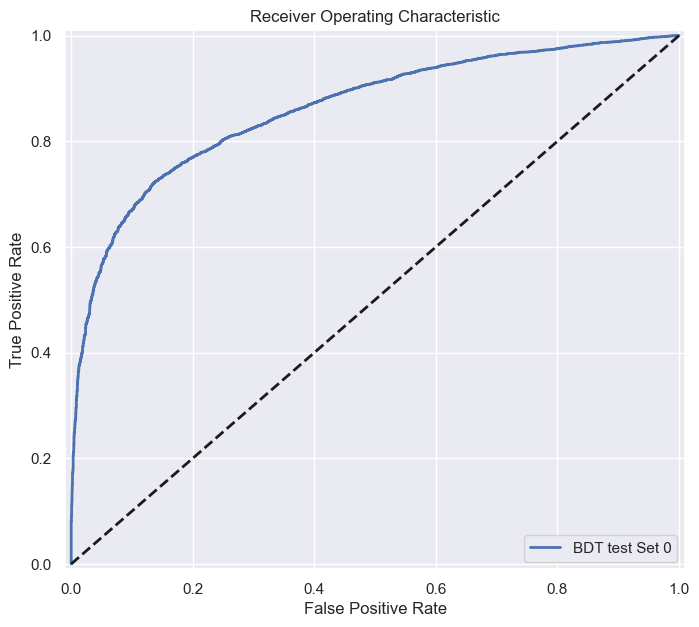

<Figure size 800x700 with 0 Axes>

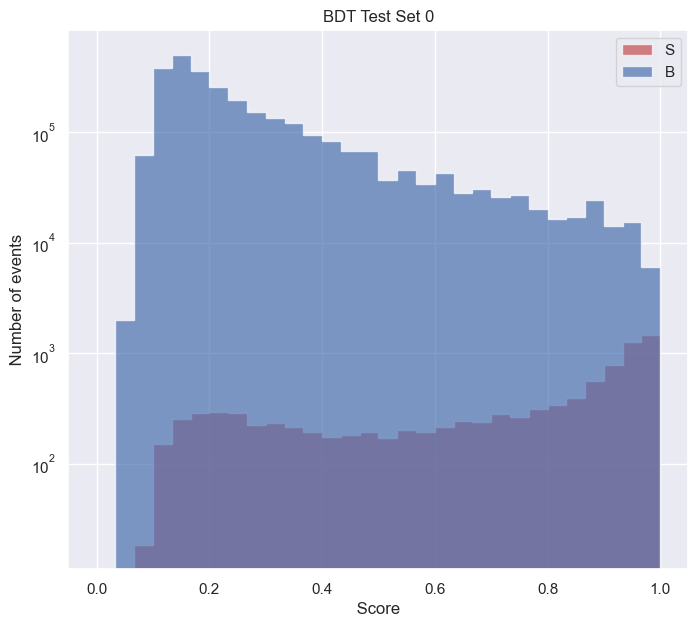

<Figure size 800x700 with 0 Axes>

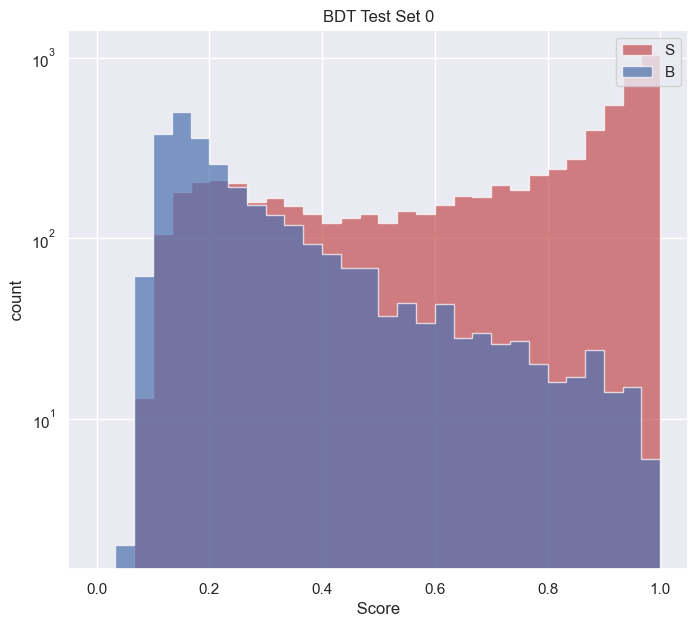

<Figure size 800x700 with 0 Axes>

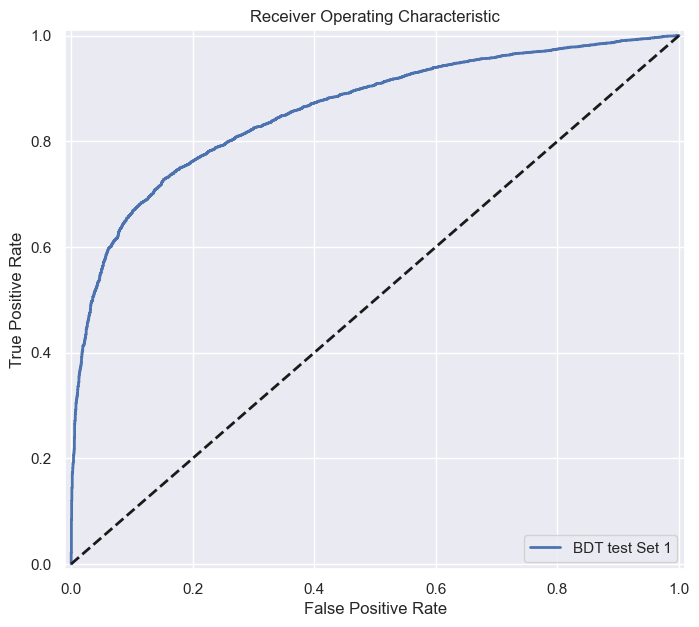

<Figure size 800x700 with 0 Axes>

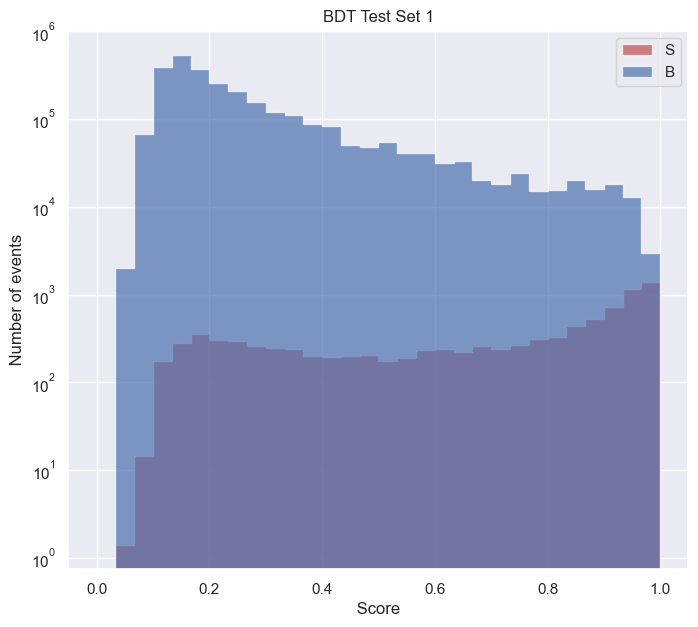

<Figure size 800x700 with 0 Axes>

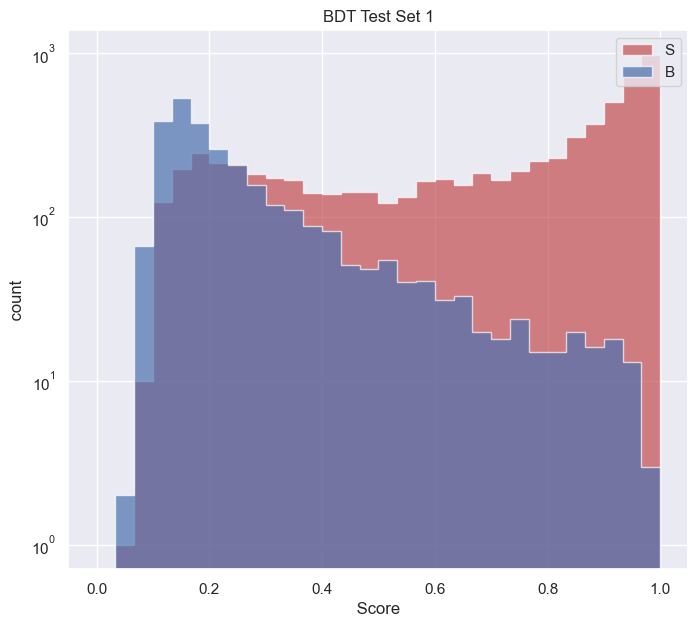

<Figure size 800x700 with 0 Axes>

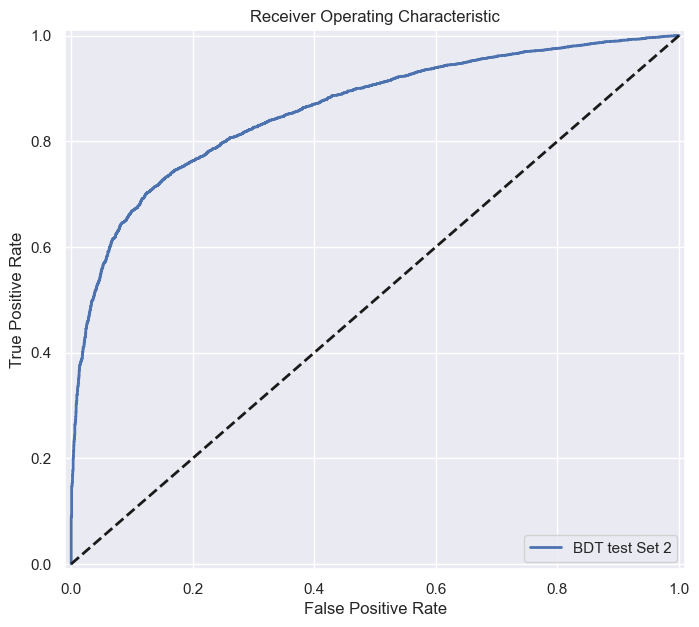

<Figure size 800x700 with 0 Axes>

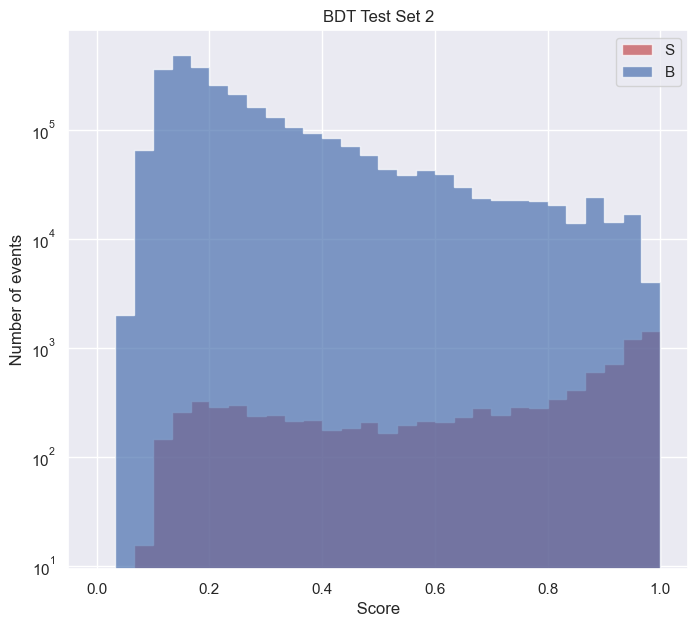

<Figure size 800x700 with 0 Axes>

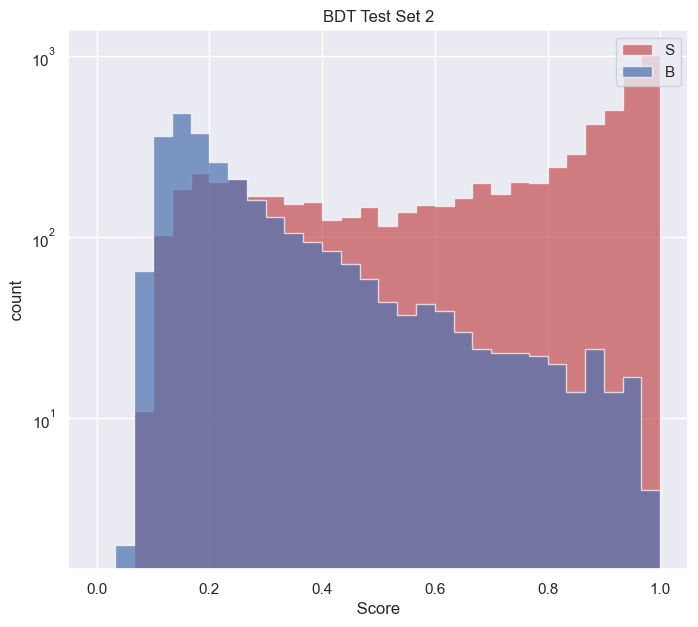

<Figure size 800x700 with 0 Axes>

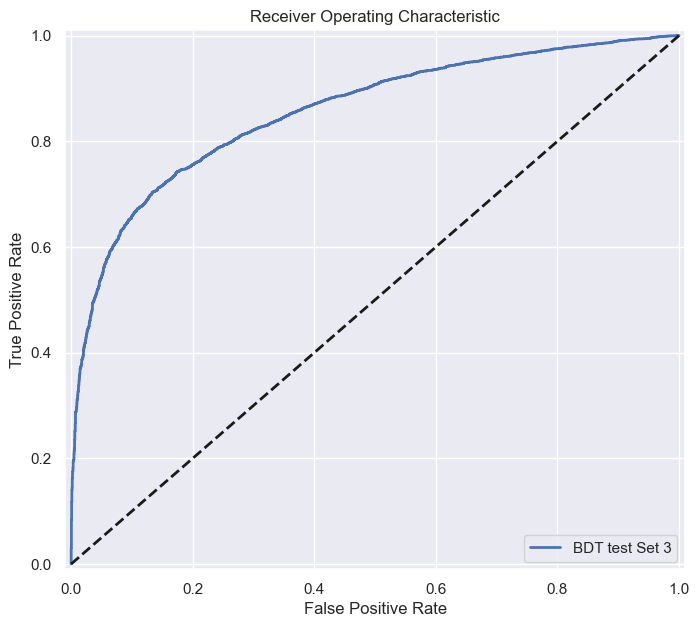

<Figure size 800x700 with 0 Axes>

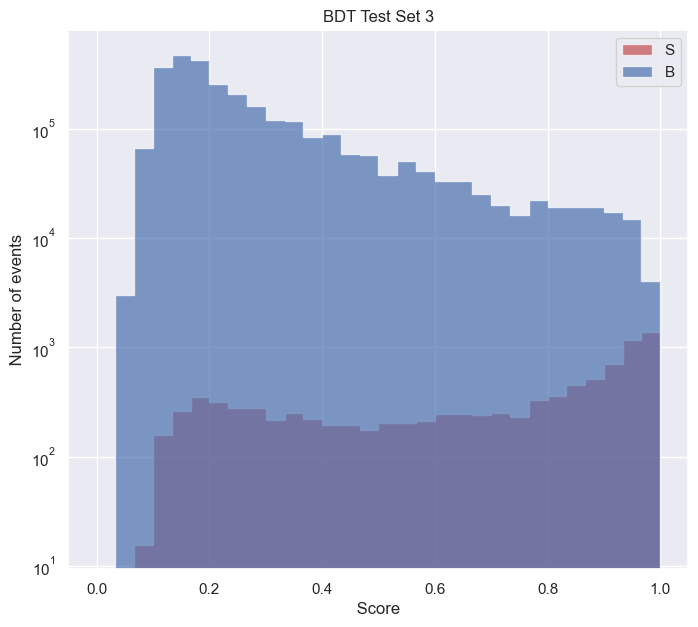

<Figure size 800x700 with 0 Axes>

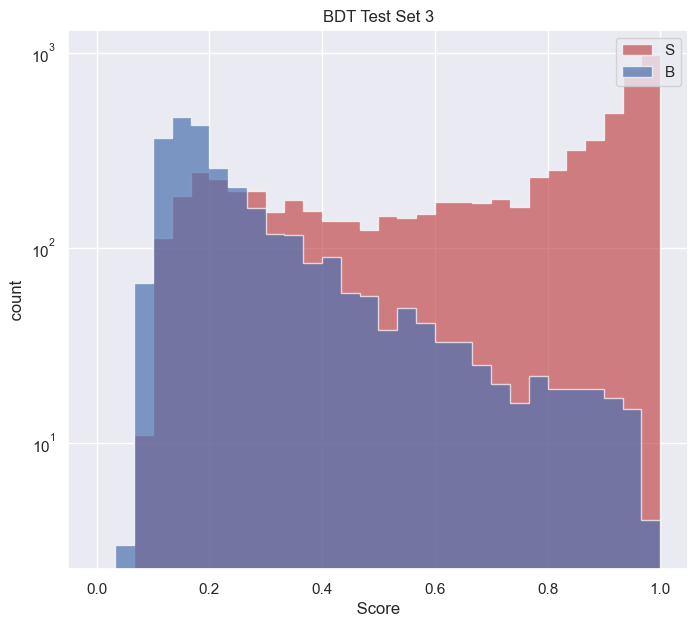

<Figure size 800x700 with 0 Axes>

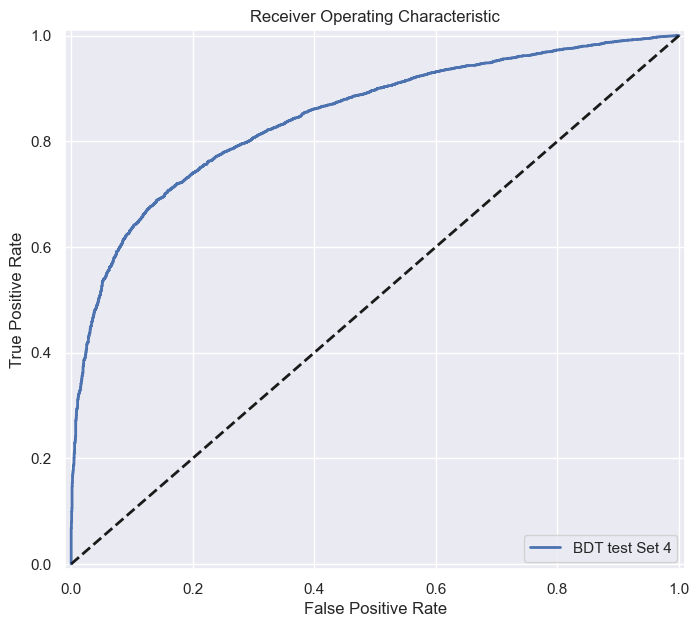

<Figure size 800x700 with 0 Axes>

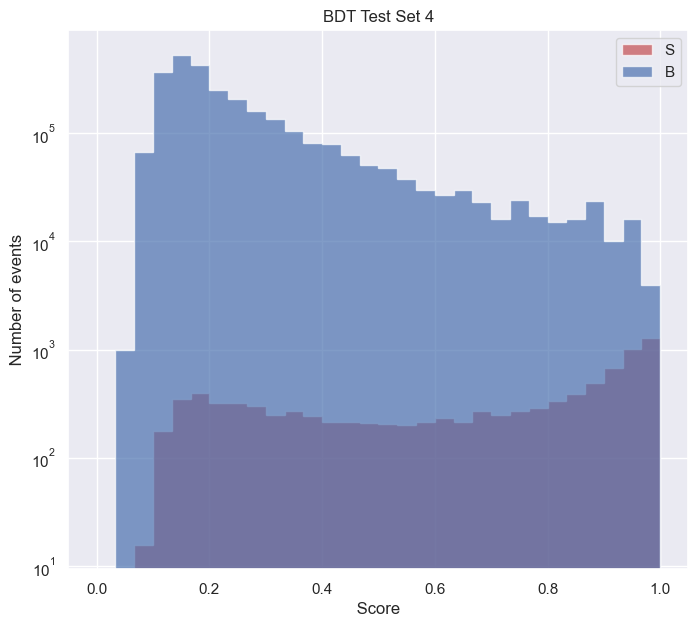

<Figure size 800x700 with 0 Axes>

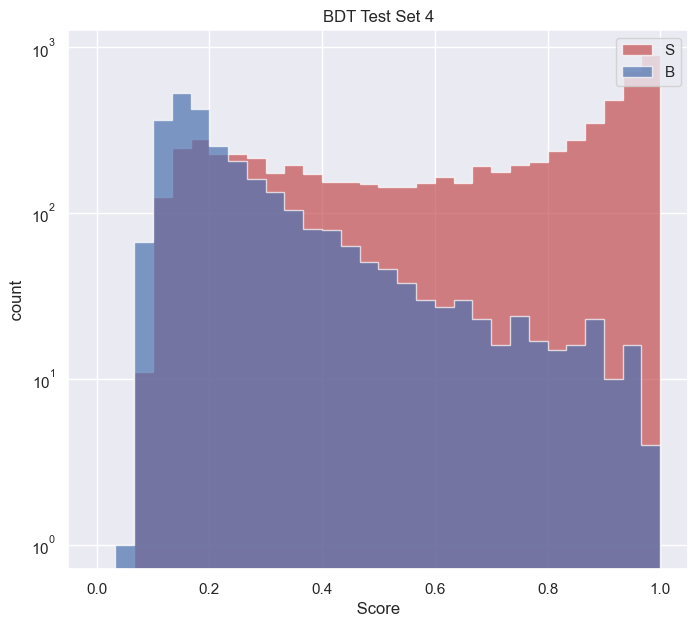

<Figure size 800x700 with 0 Axes>

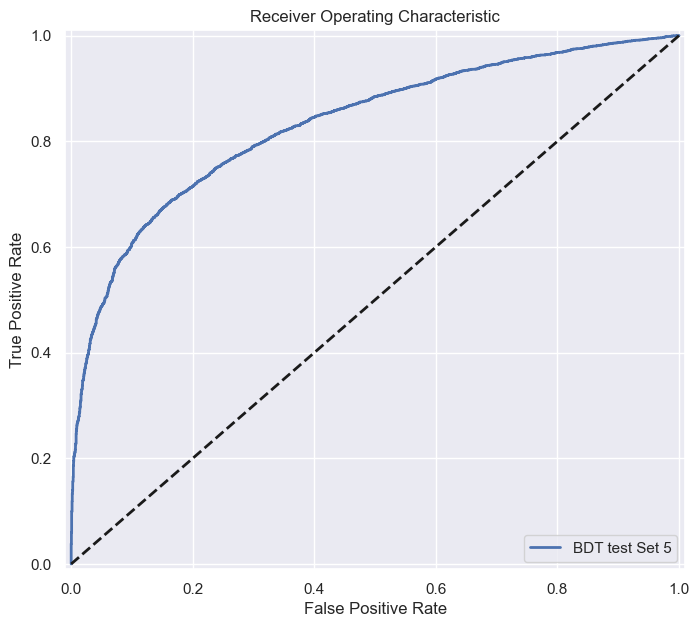

<Figure size 800x700 with 0 Axes>

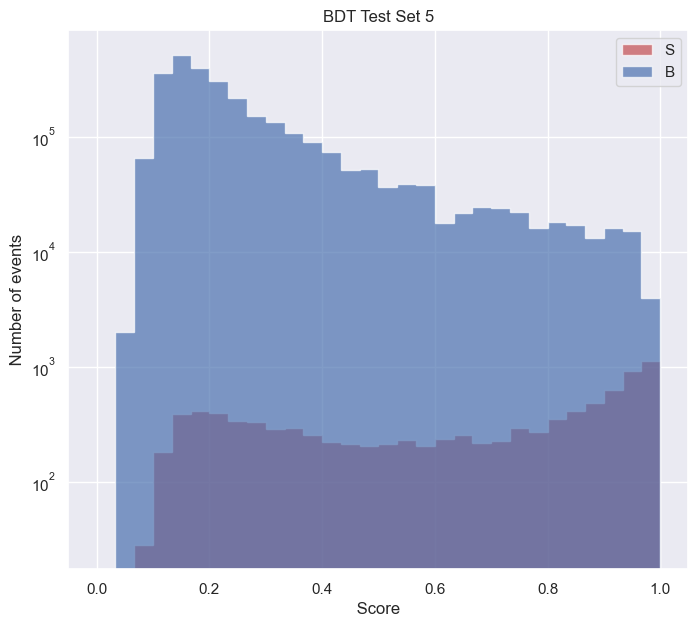

<Figure size 800x700 with 0 Axes>

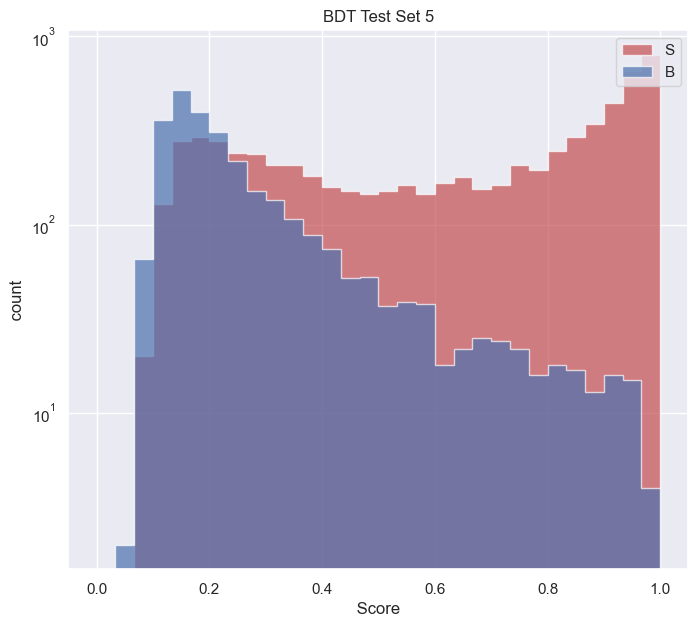

<Figure size 800x700 with 0 Axes>

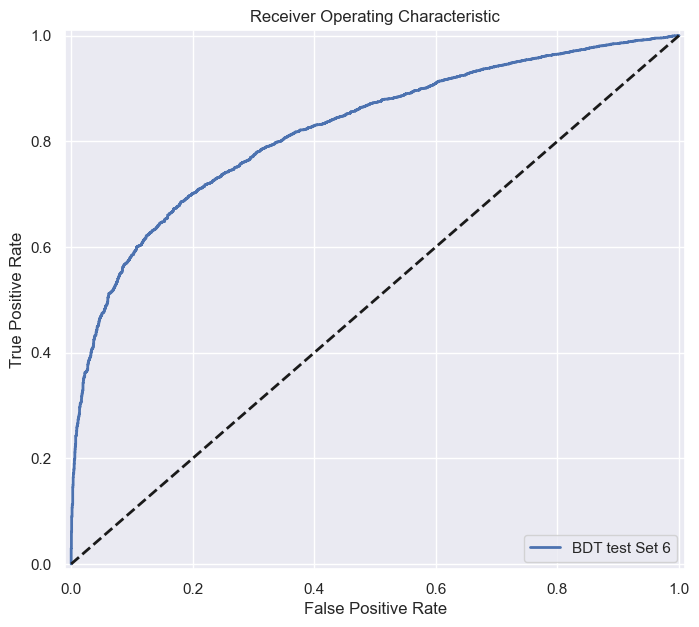

<Figure size 800x700 with 0 Axes>

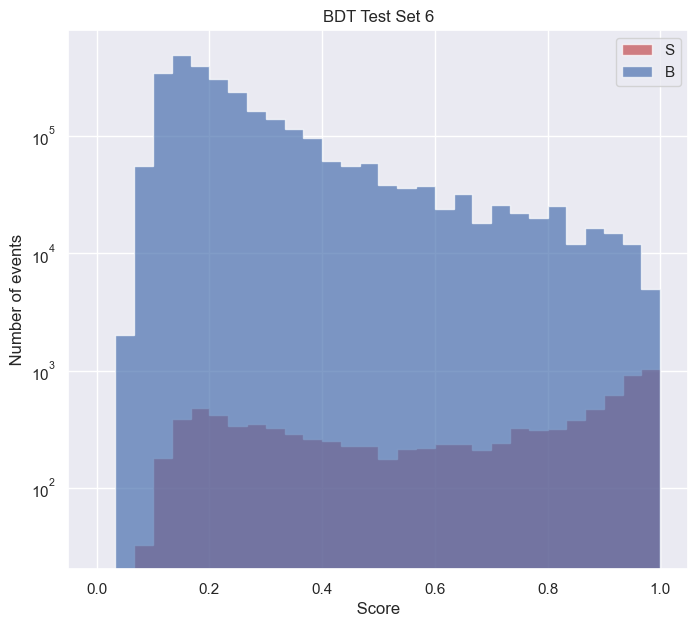

<Figure size 800x700 with 0 Axes>

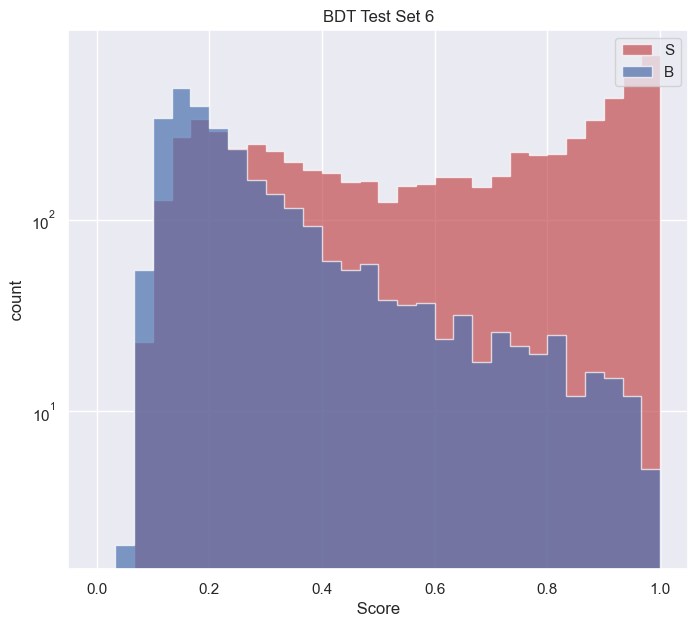

<Figure size 800x700 with 0 Axes>

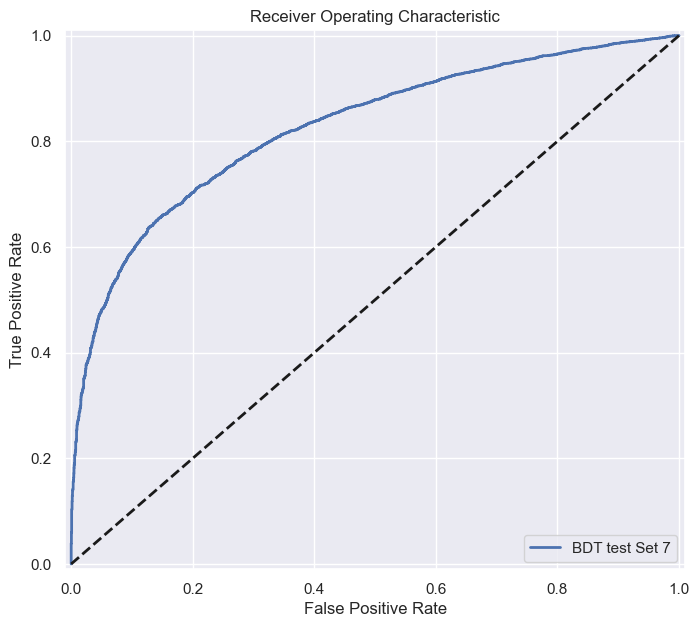

<Figure size 800x700 with 0 Axes>

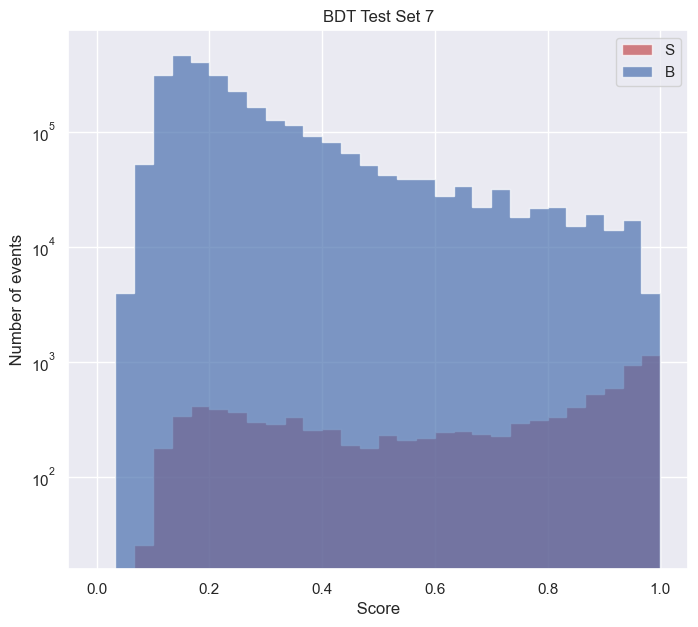

<Figure size 800x700 with 0 Axes>

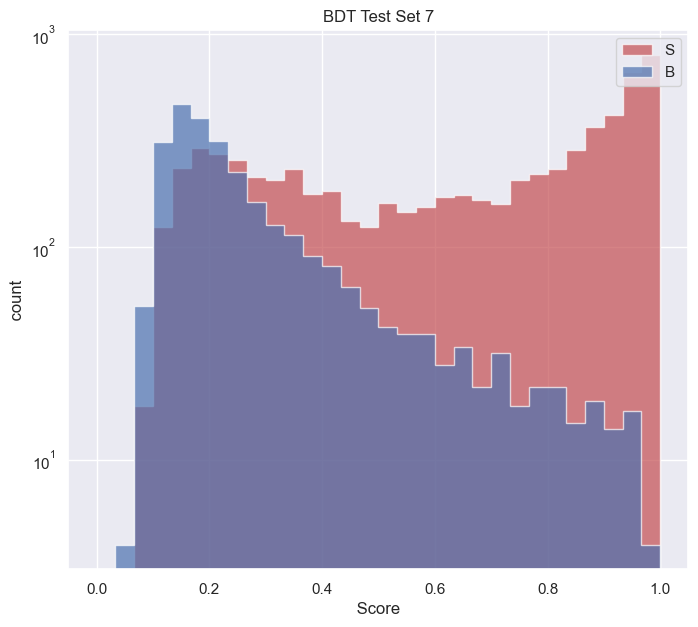

<Figure size 800x700 with 0 Axes>

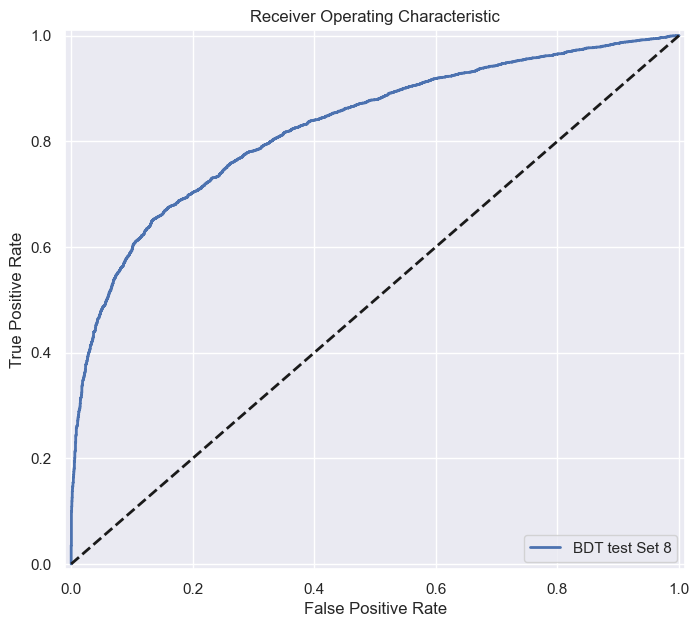

<Figure size 800x700 with 0 Axes>

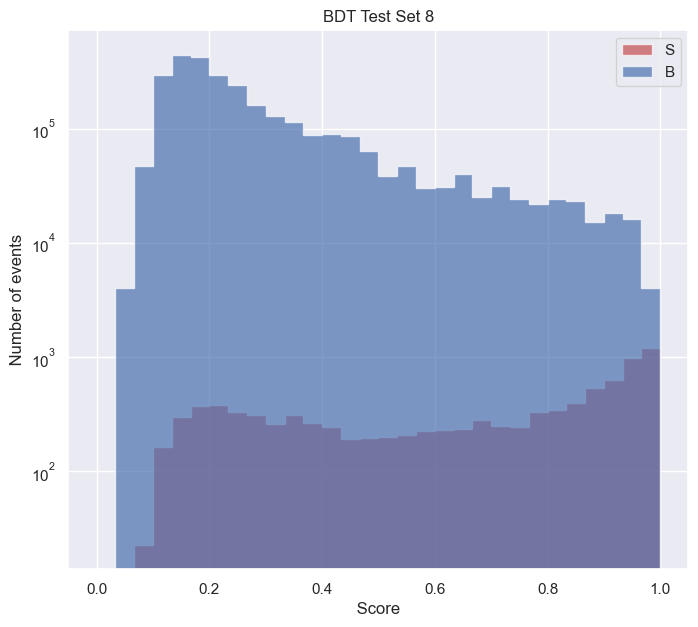

<Figure size 800x700 with 0 Axes>

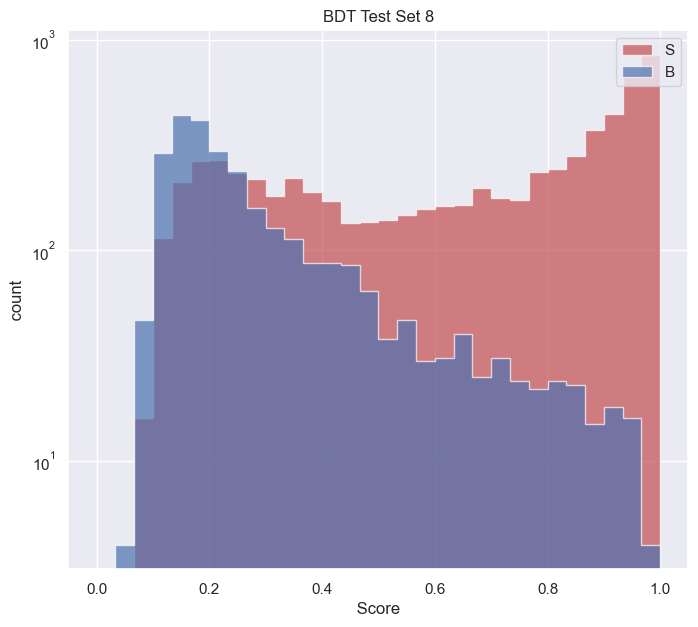

<Figure size 800x700 with 0 Axes>

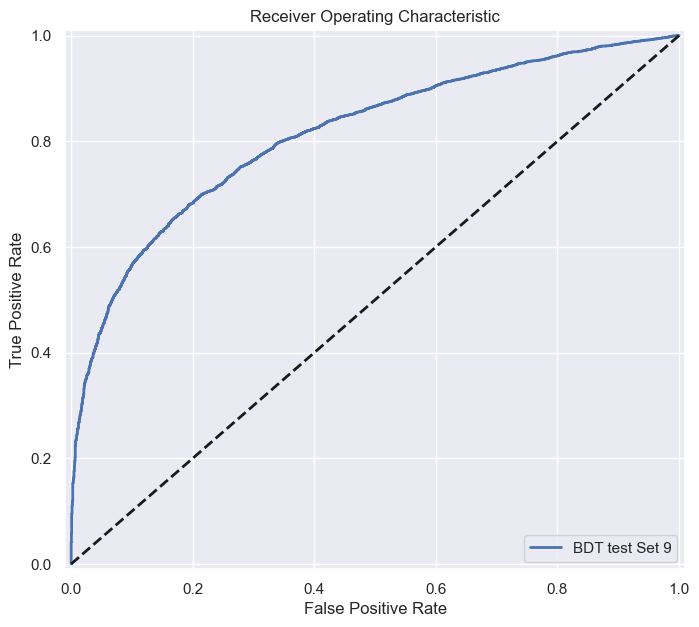

<Figure size 800x700 with 0 Axes>

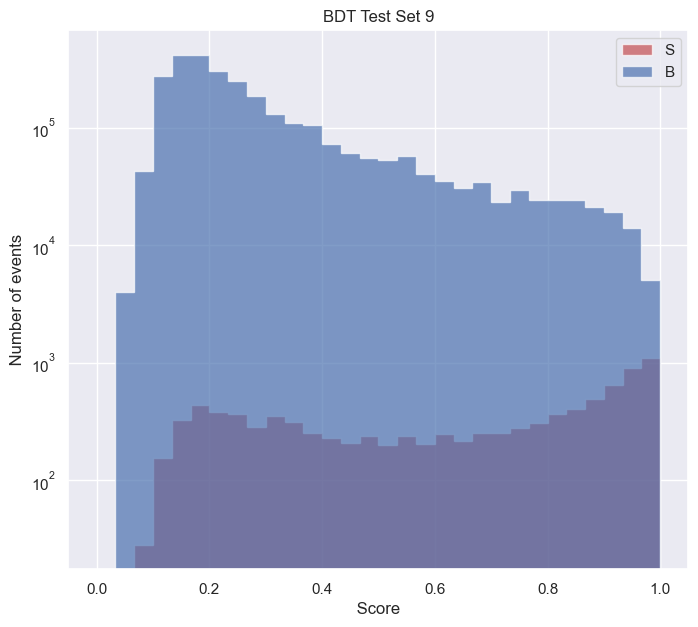

<Figure size 800x700 with 0 Axes>

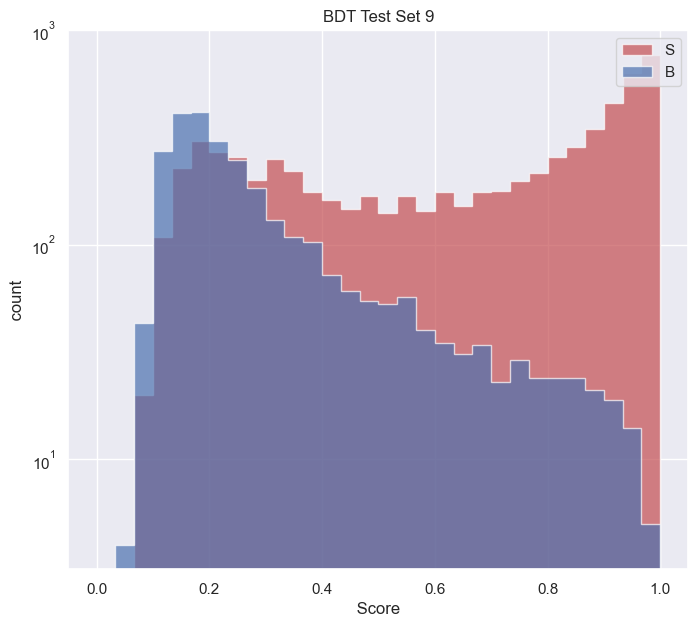

In [22]:
i = 0
for valid_set in model.validation_sets:
    roc_curve_(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(valid_set['score'],valid_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

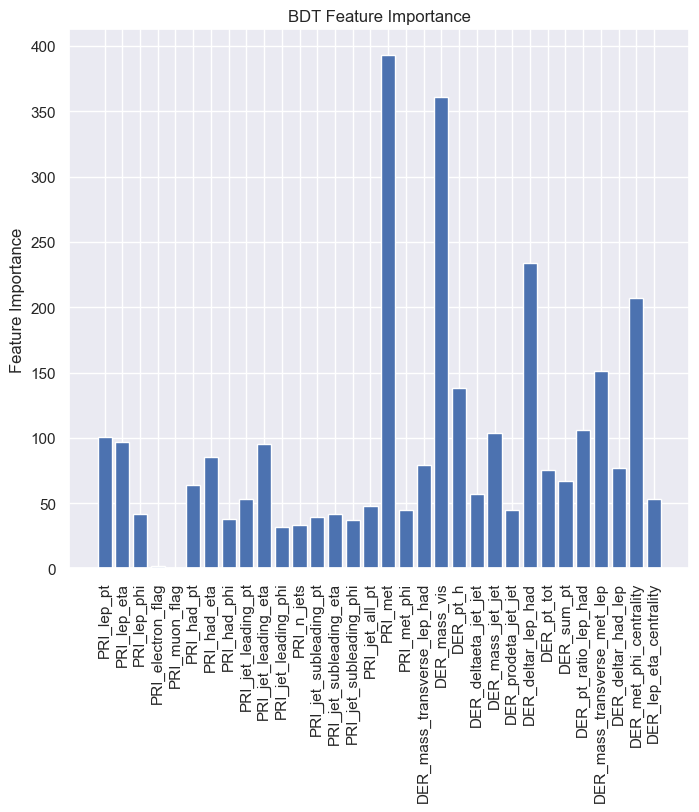

['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi', 'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep', 'DER_deltar_had_lep', 'DER_met_phi_centrality', 'DER_lep_eta_centrality']


In [23]:
feature_importance_plot(Train_data_vis.columns,model.model.feature_importances_,model.model_name)


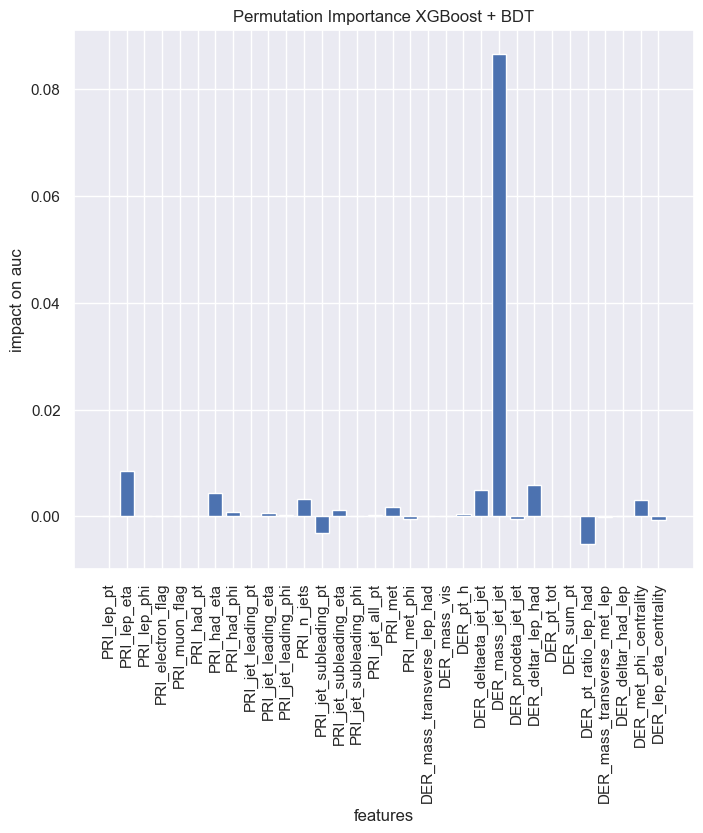

In [24]:
permutation_importance(model.model,Train_data_vis, model.model_name)

In [25]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

[*] Saving result
[*] --- delta_mu_hat: 0.0808437639114836
[*] --- mu_hats (avg): -0.21871999608526155

---------------------------------
[✔] Total duration: 0:03:06.814151
---------------------------------


## End

In [26]:
    print("############################################")
    print("### Scoring Program")
    print("############################################\n")

    # Init scoring
    scoring = Scoring()

    # Start timer
    scoring.start_timer()

    # Load test settings
    scoring.load_test_settings()

    # Load ingestions results
    scoring.load_ingestion_results()

    # Compute Scores
    scoring.compute_scores()

    # Write scores
    scoring.write_scores()

    # Stop timer
    scoring.stop_timer()

    # Show duration
    scoring.show_duration()

    print("\n----------------------------------------------")
    print("[✔] Scoring Program executed successfully!")
    print("----------------------------------------------\n\n")


############################################
### Scoring Program
############################################

[*] Reading test settings
[✔]
[*] Reading predictions
[✔]
[*] Computing scores
[*] --- delta_mu_hat: 0.081
[*] --- MAE (mu): 1.653
[*] --- MSE (mu): 3.481
[*] --- MAE (delta mu): 1.604
[*] --- MSE (delta mu): 3.246
[*] --- coverage (mu): 0.0
[*] --- coverage (C): 0.0
[*] --- score (MAE): 3.257
[*] --- score (MSE): 6.727
[✔]
[*] Writing scores
[✔]

---------------------------------
[✔] Total duration: 0:00:00.014967
---------------------------------

----------------------------------------------
[✔] Scoring Program executed successfully!
----------------------------------------------


